In [379]:
#CocaCola

In [380]:
#!pip install pmdarima

In [381]:
#Importing Necesary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [382]:
#Read the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/CocaColaSales.csv')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [383]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [385]:
#Forecasting Methods- Visualization, Model Based Methods, ARIMA

In [386]:
#1.Visualization

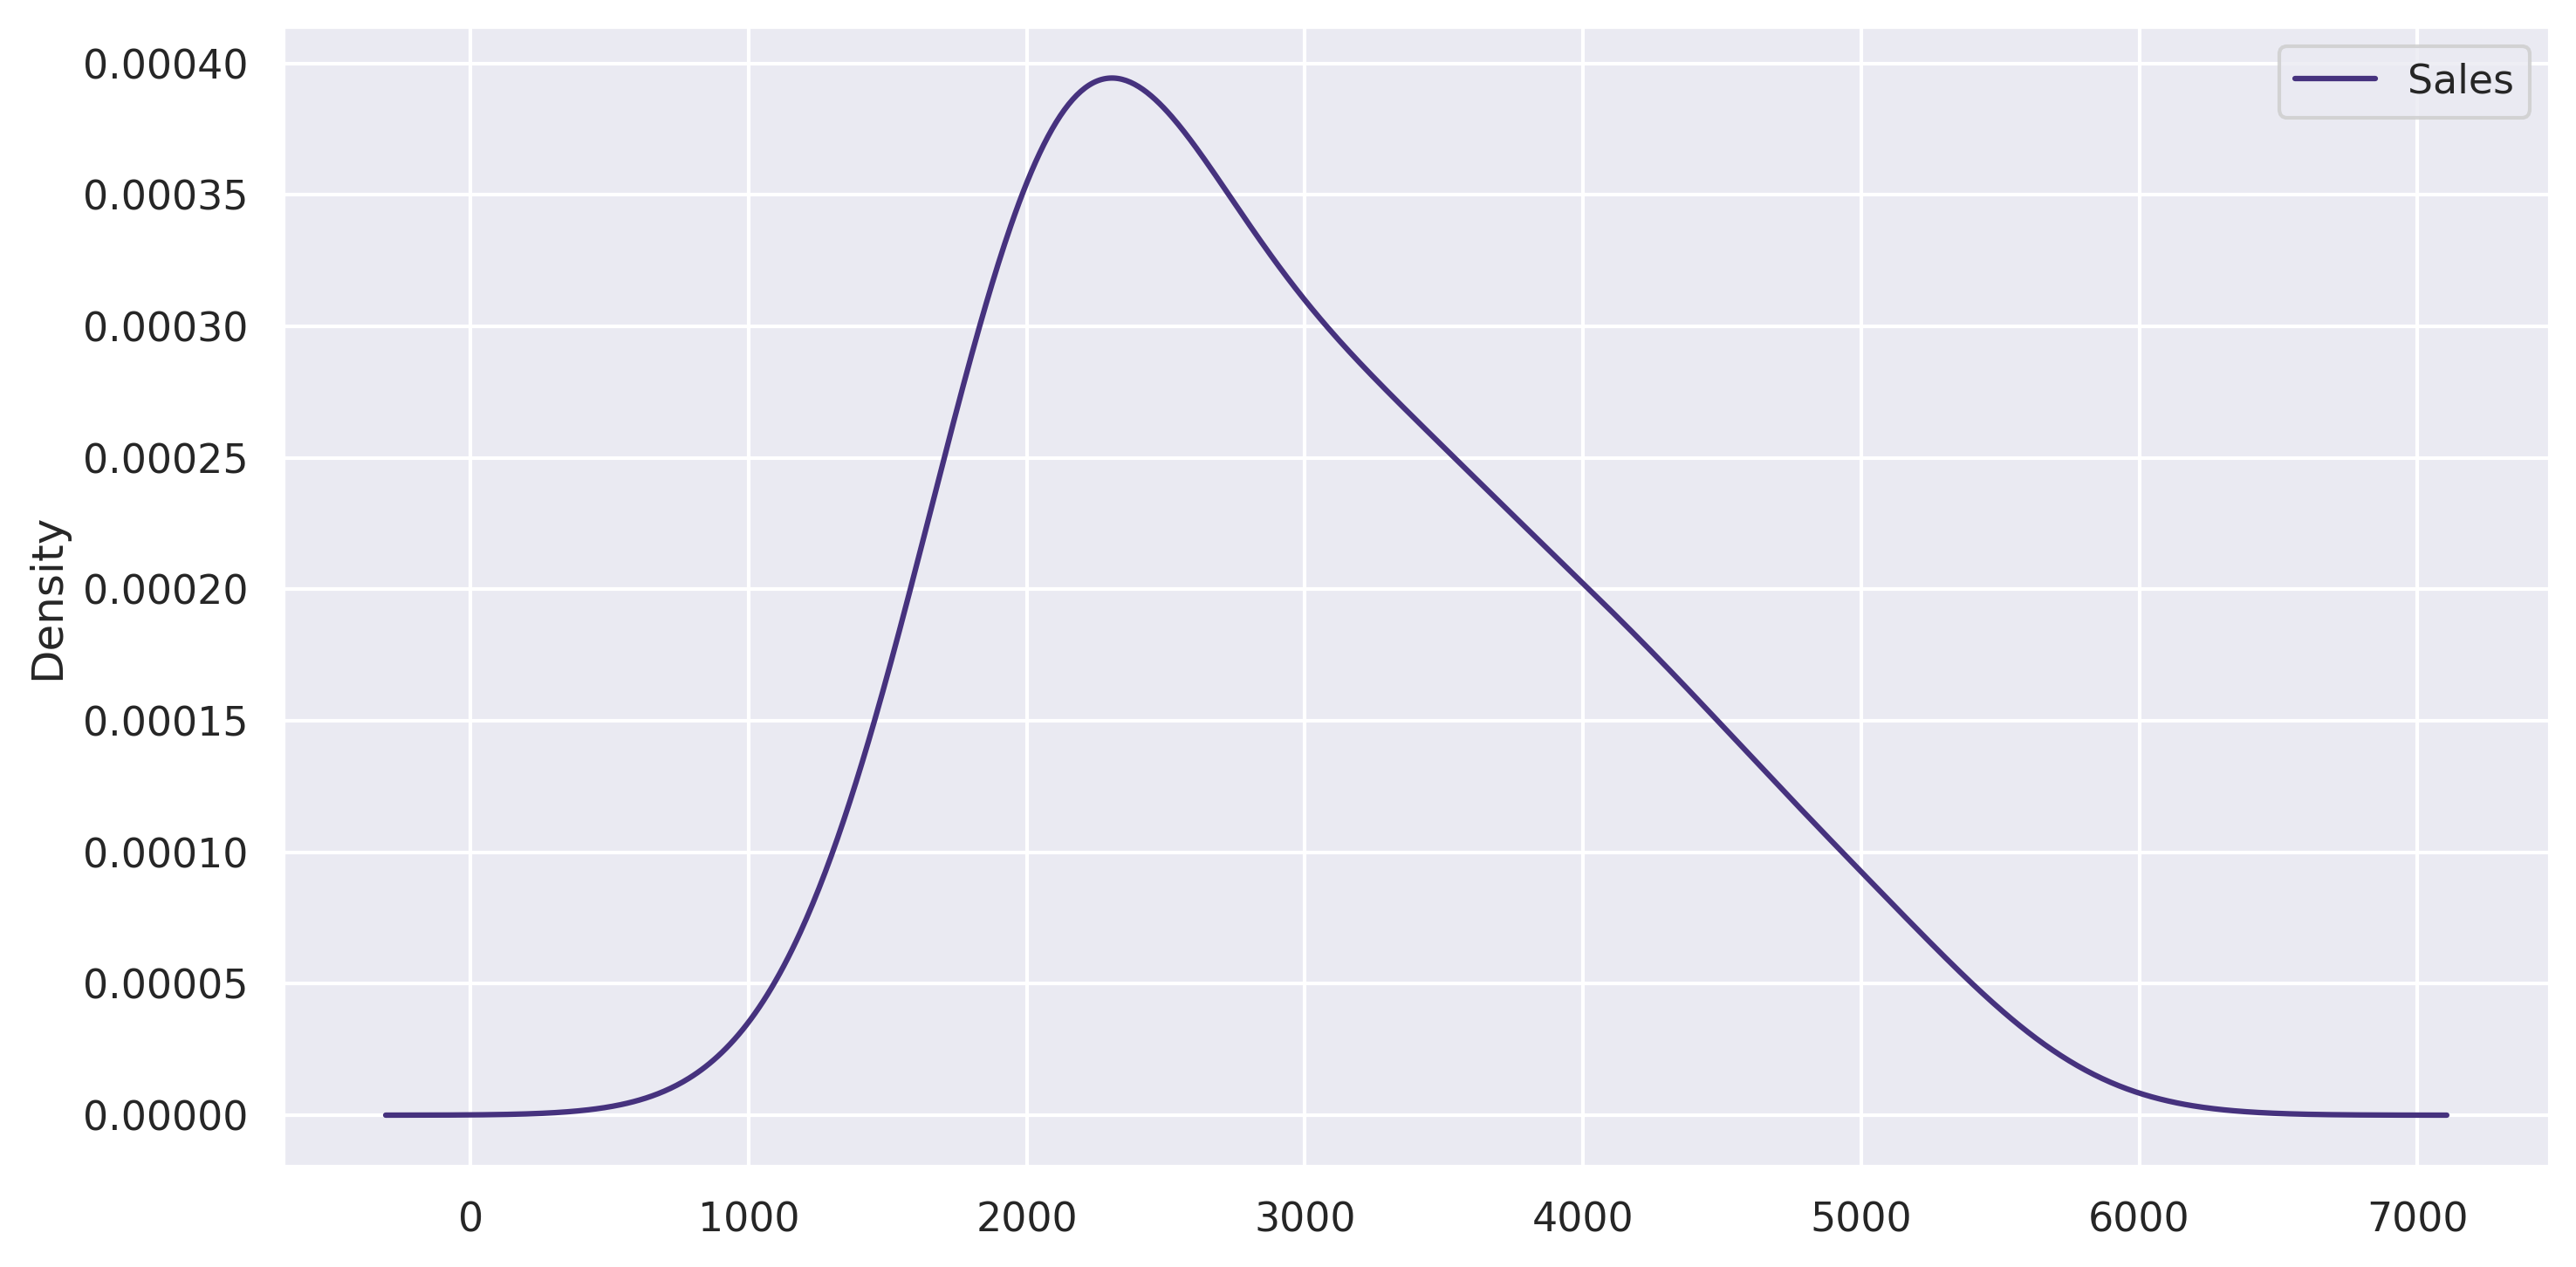

In [387]:
df.plot(kind='kde')
plt.tight_layout()
plt.show()

In [388]:
#Histogram And density Plots
from pandas import read_csv

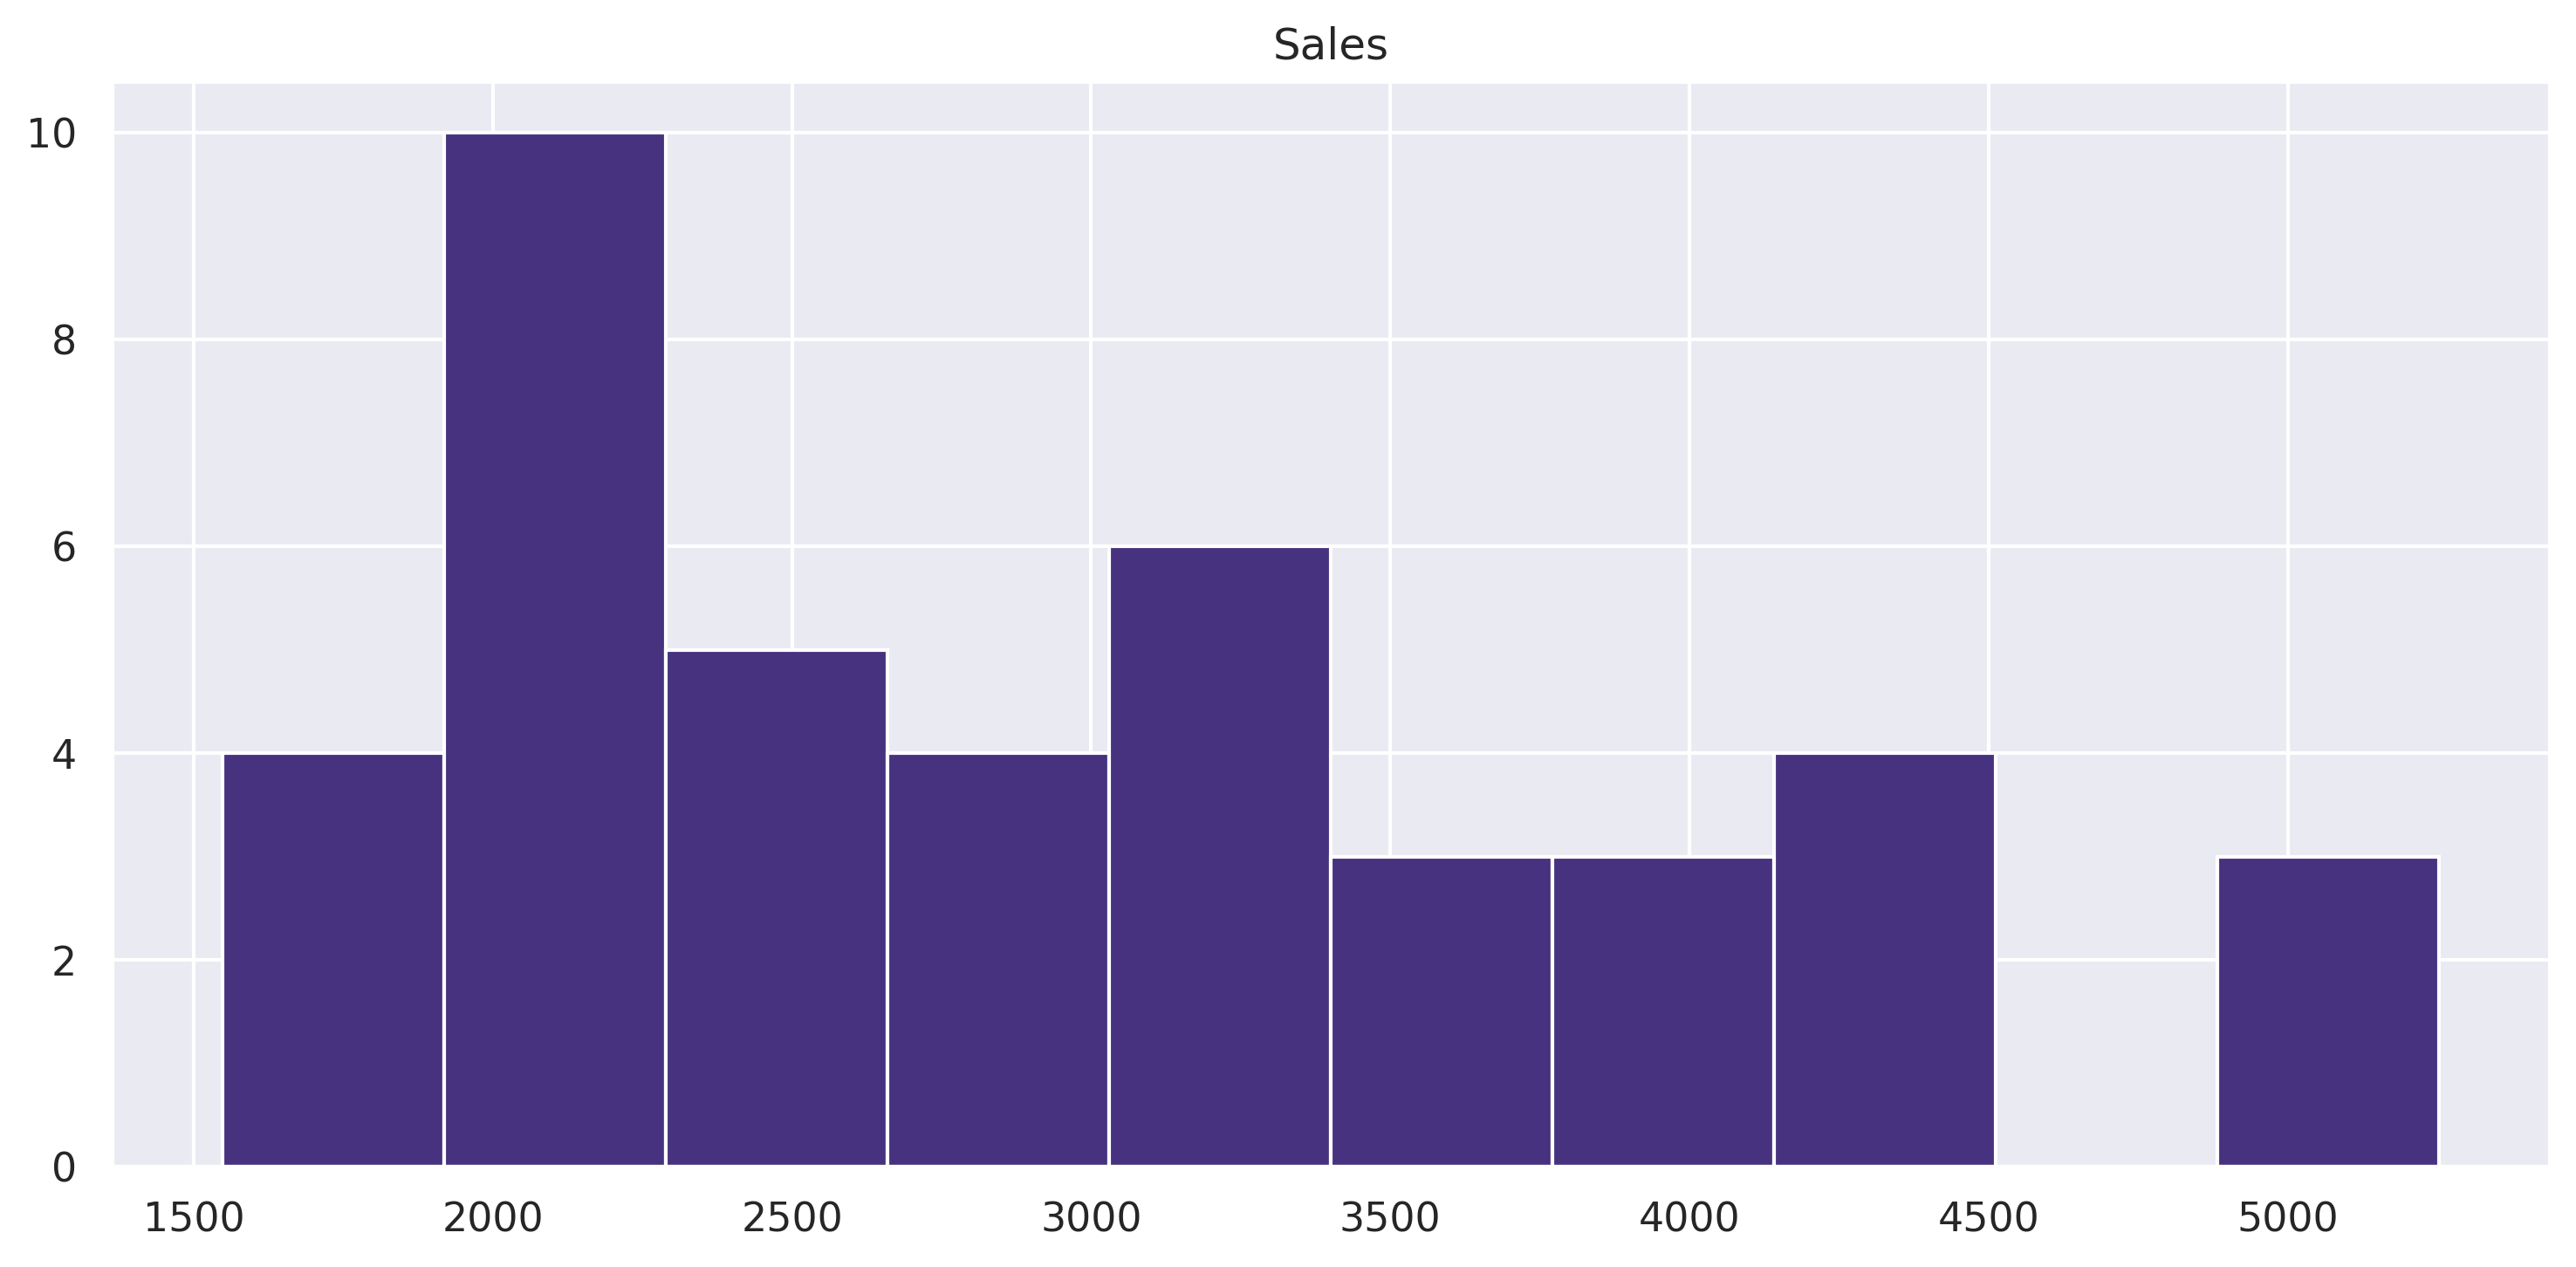

In [389]:
df.hist()
plt.tight_layout()
plt.show()

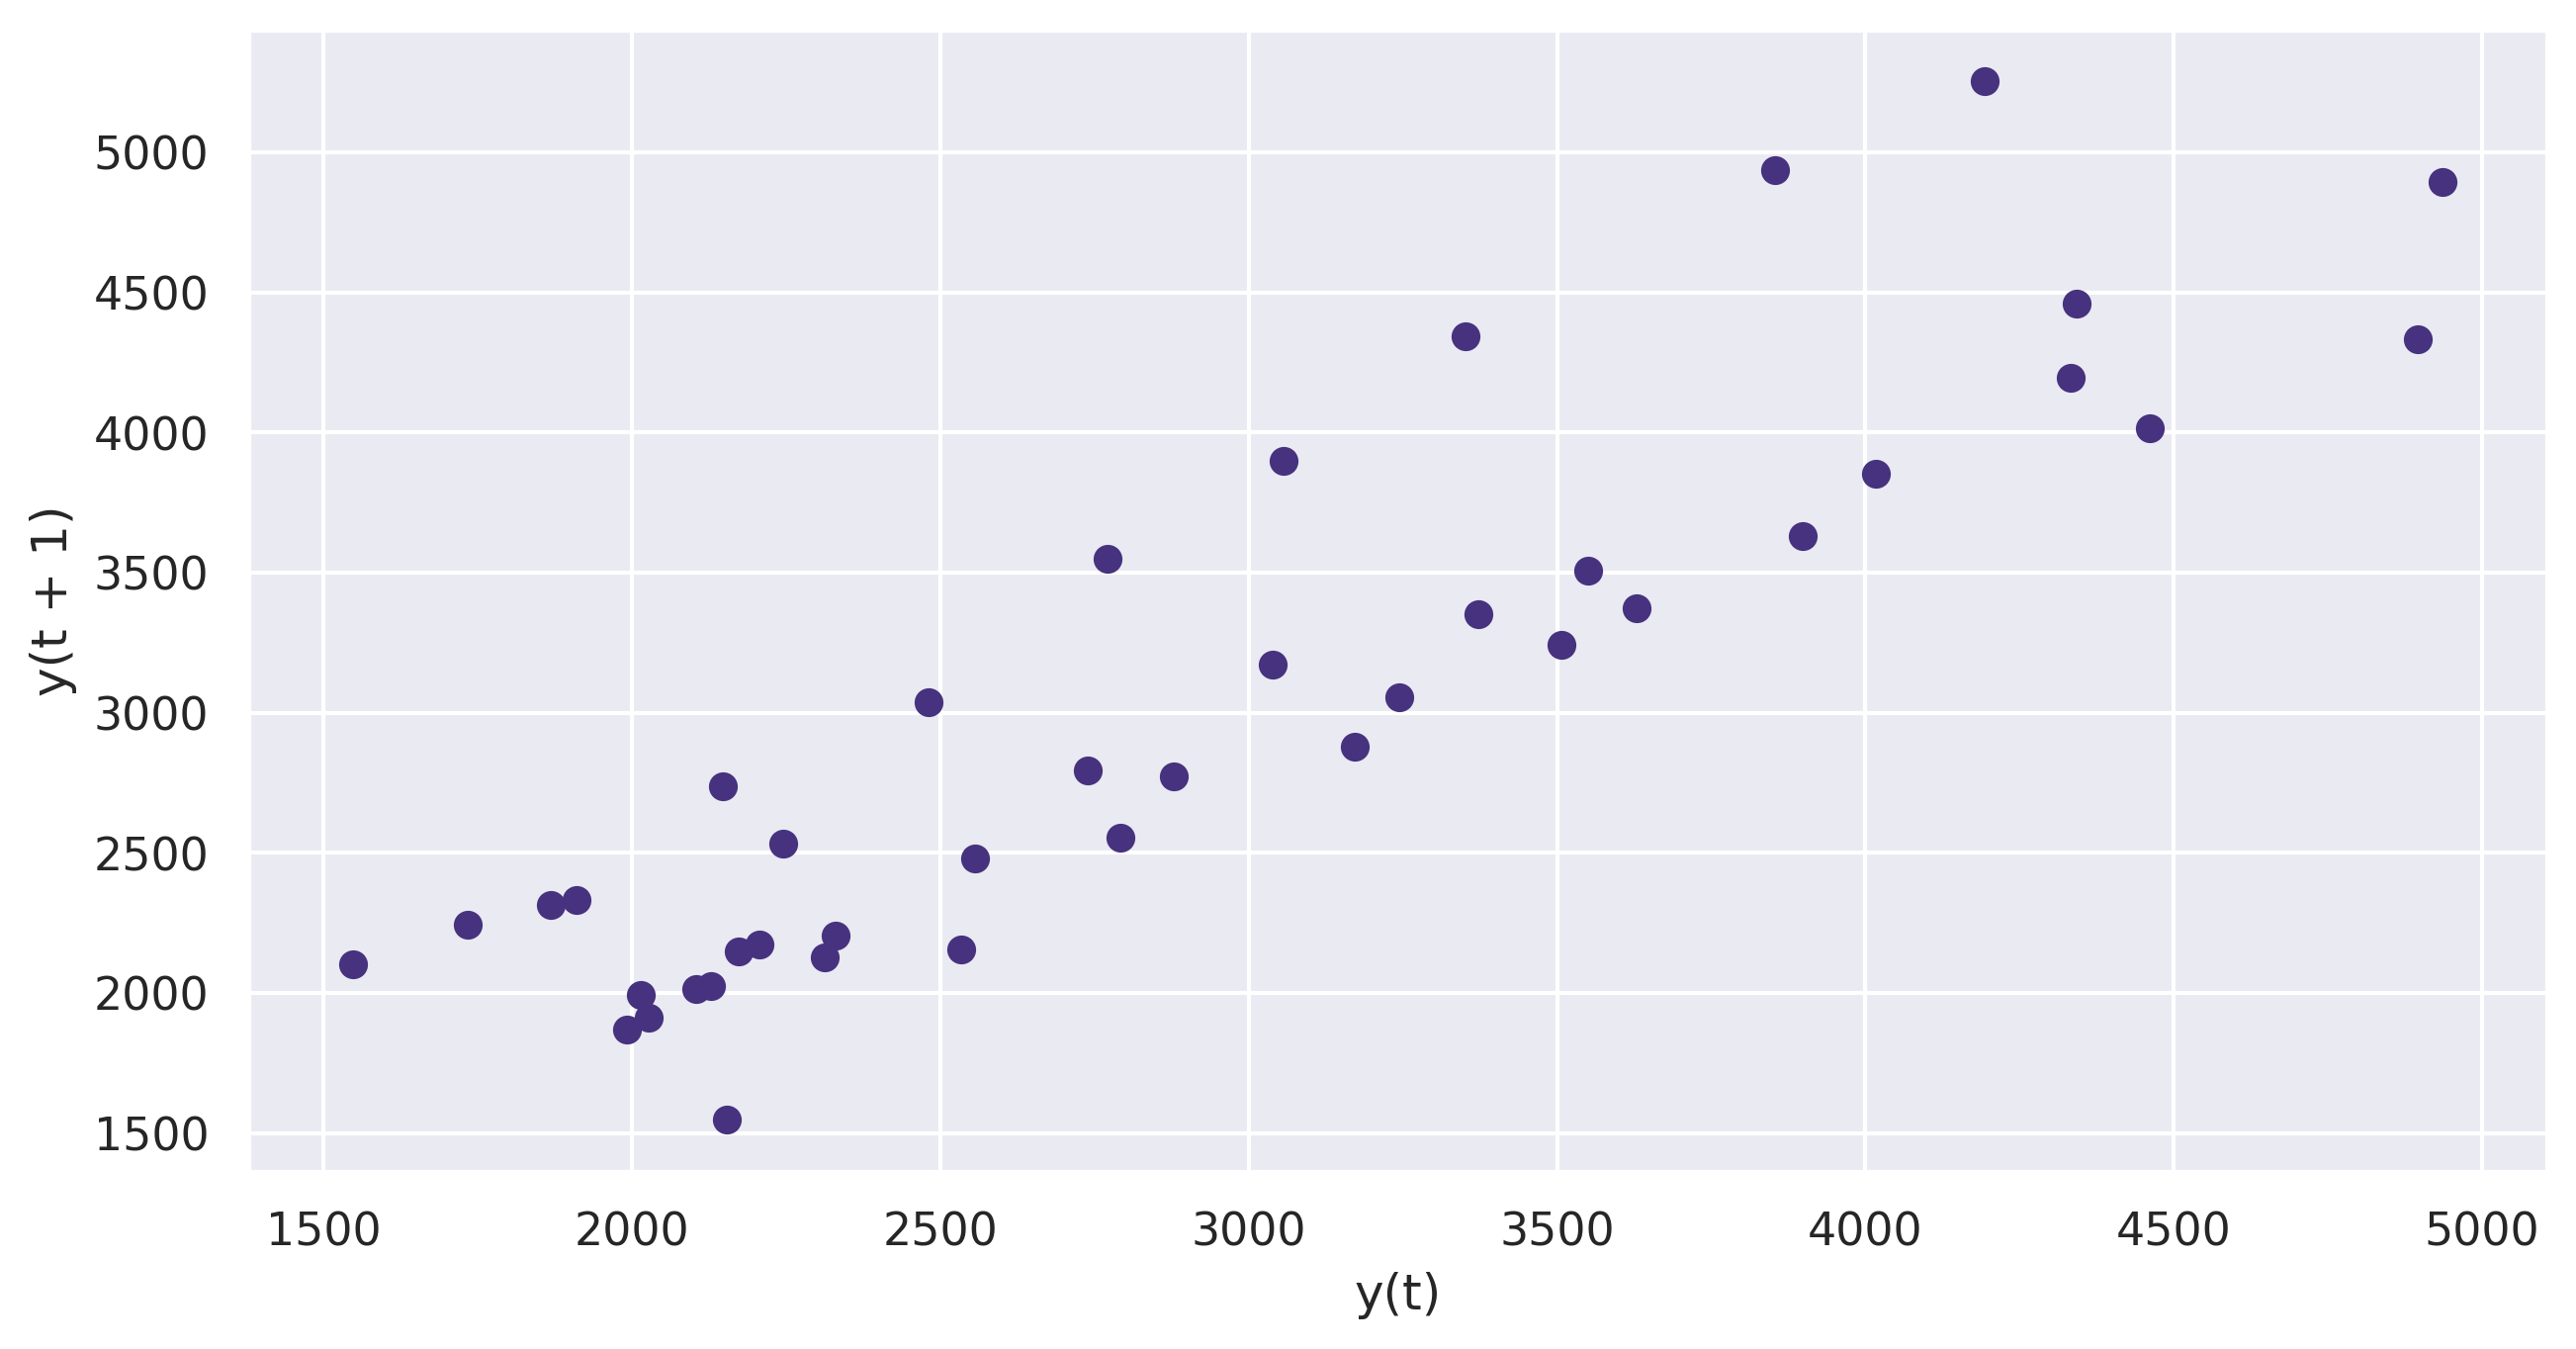

In [390]:
#Lag Plot
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

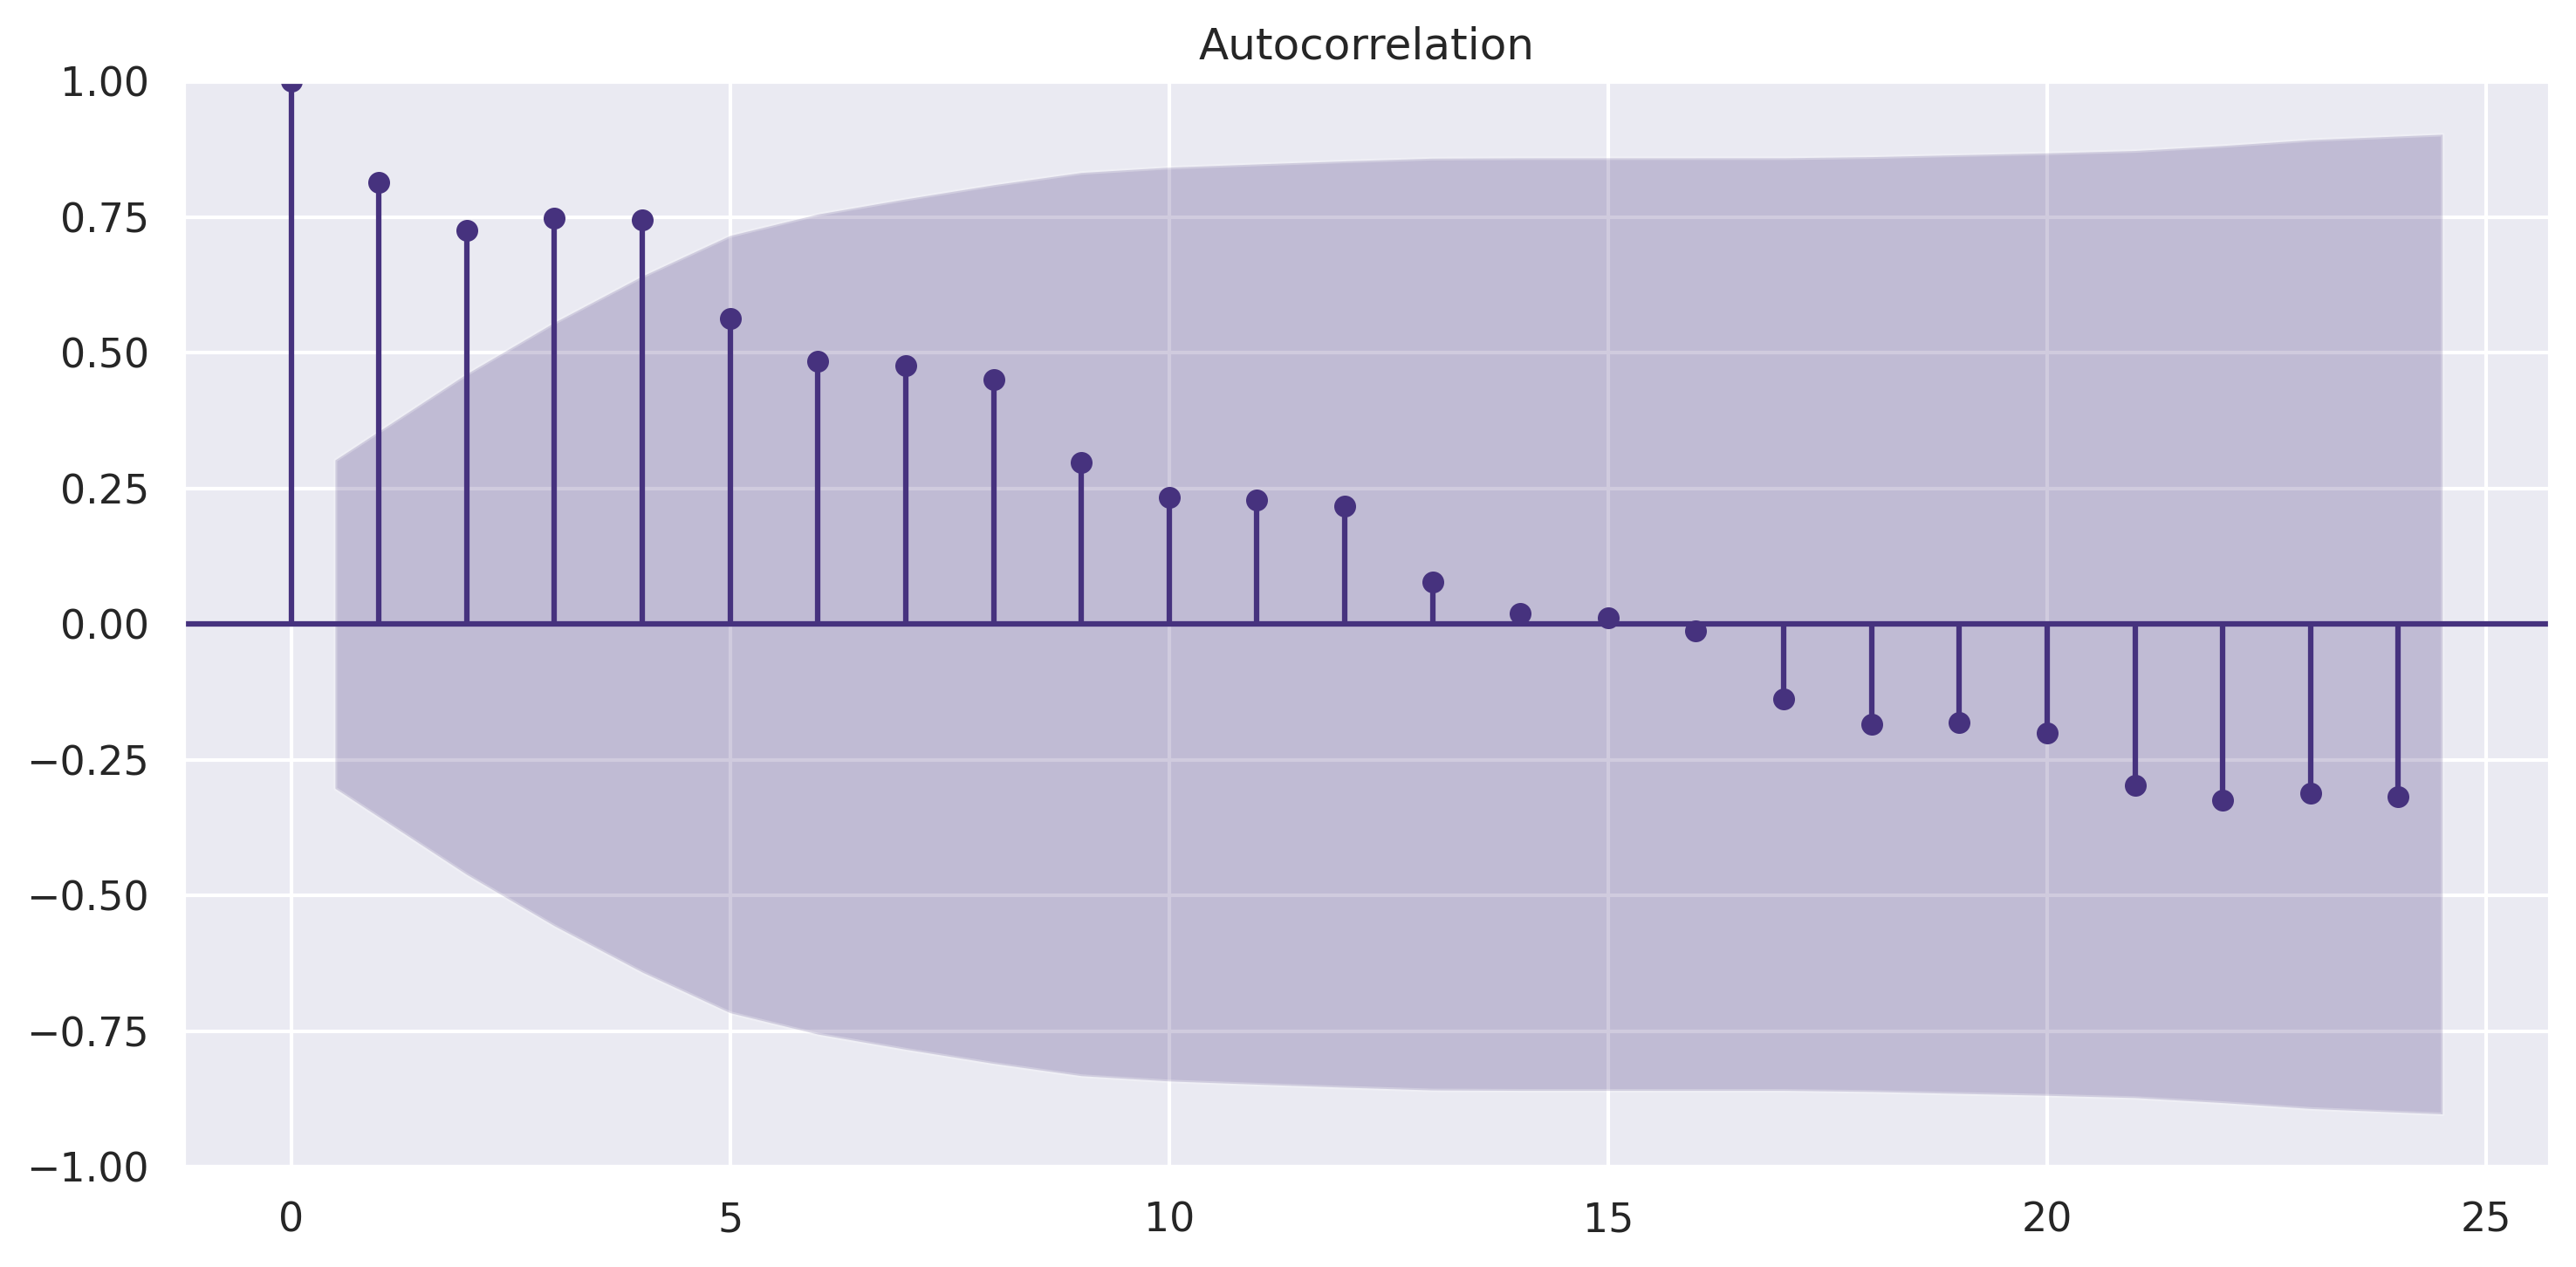

In [391]:
#Create an autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Sales'],lags=24)
plt.tight_layout()
plt.show()

<Axes: >

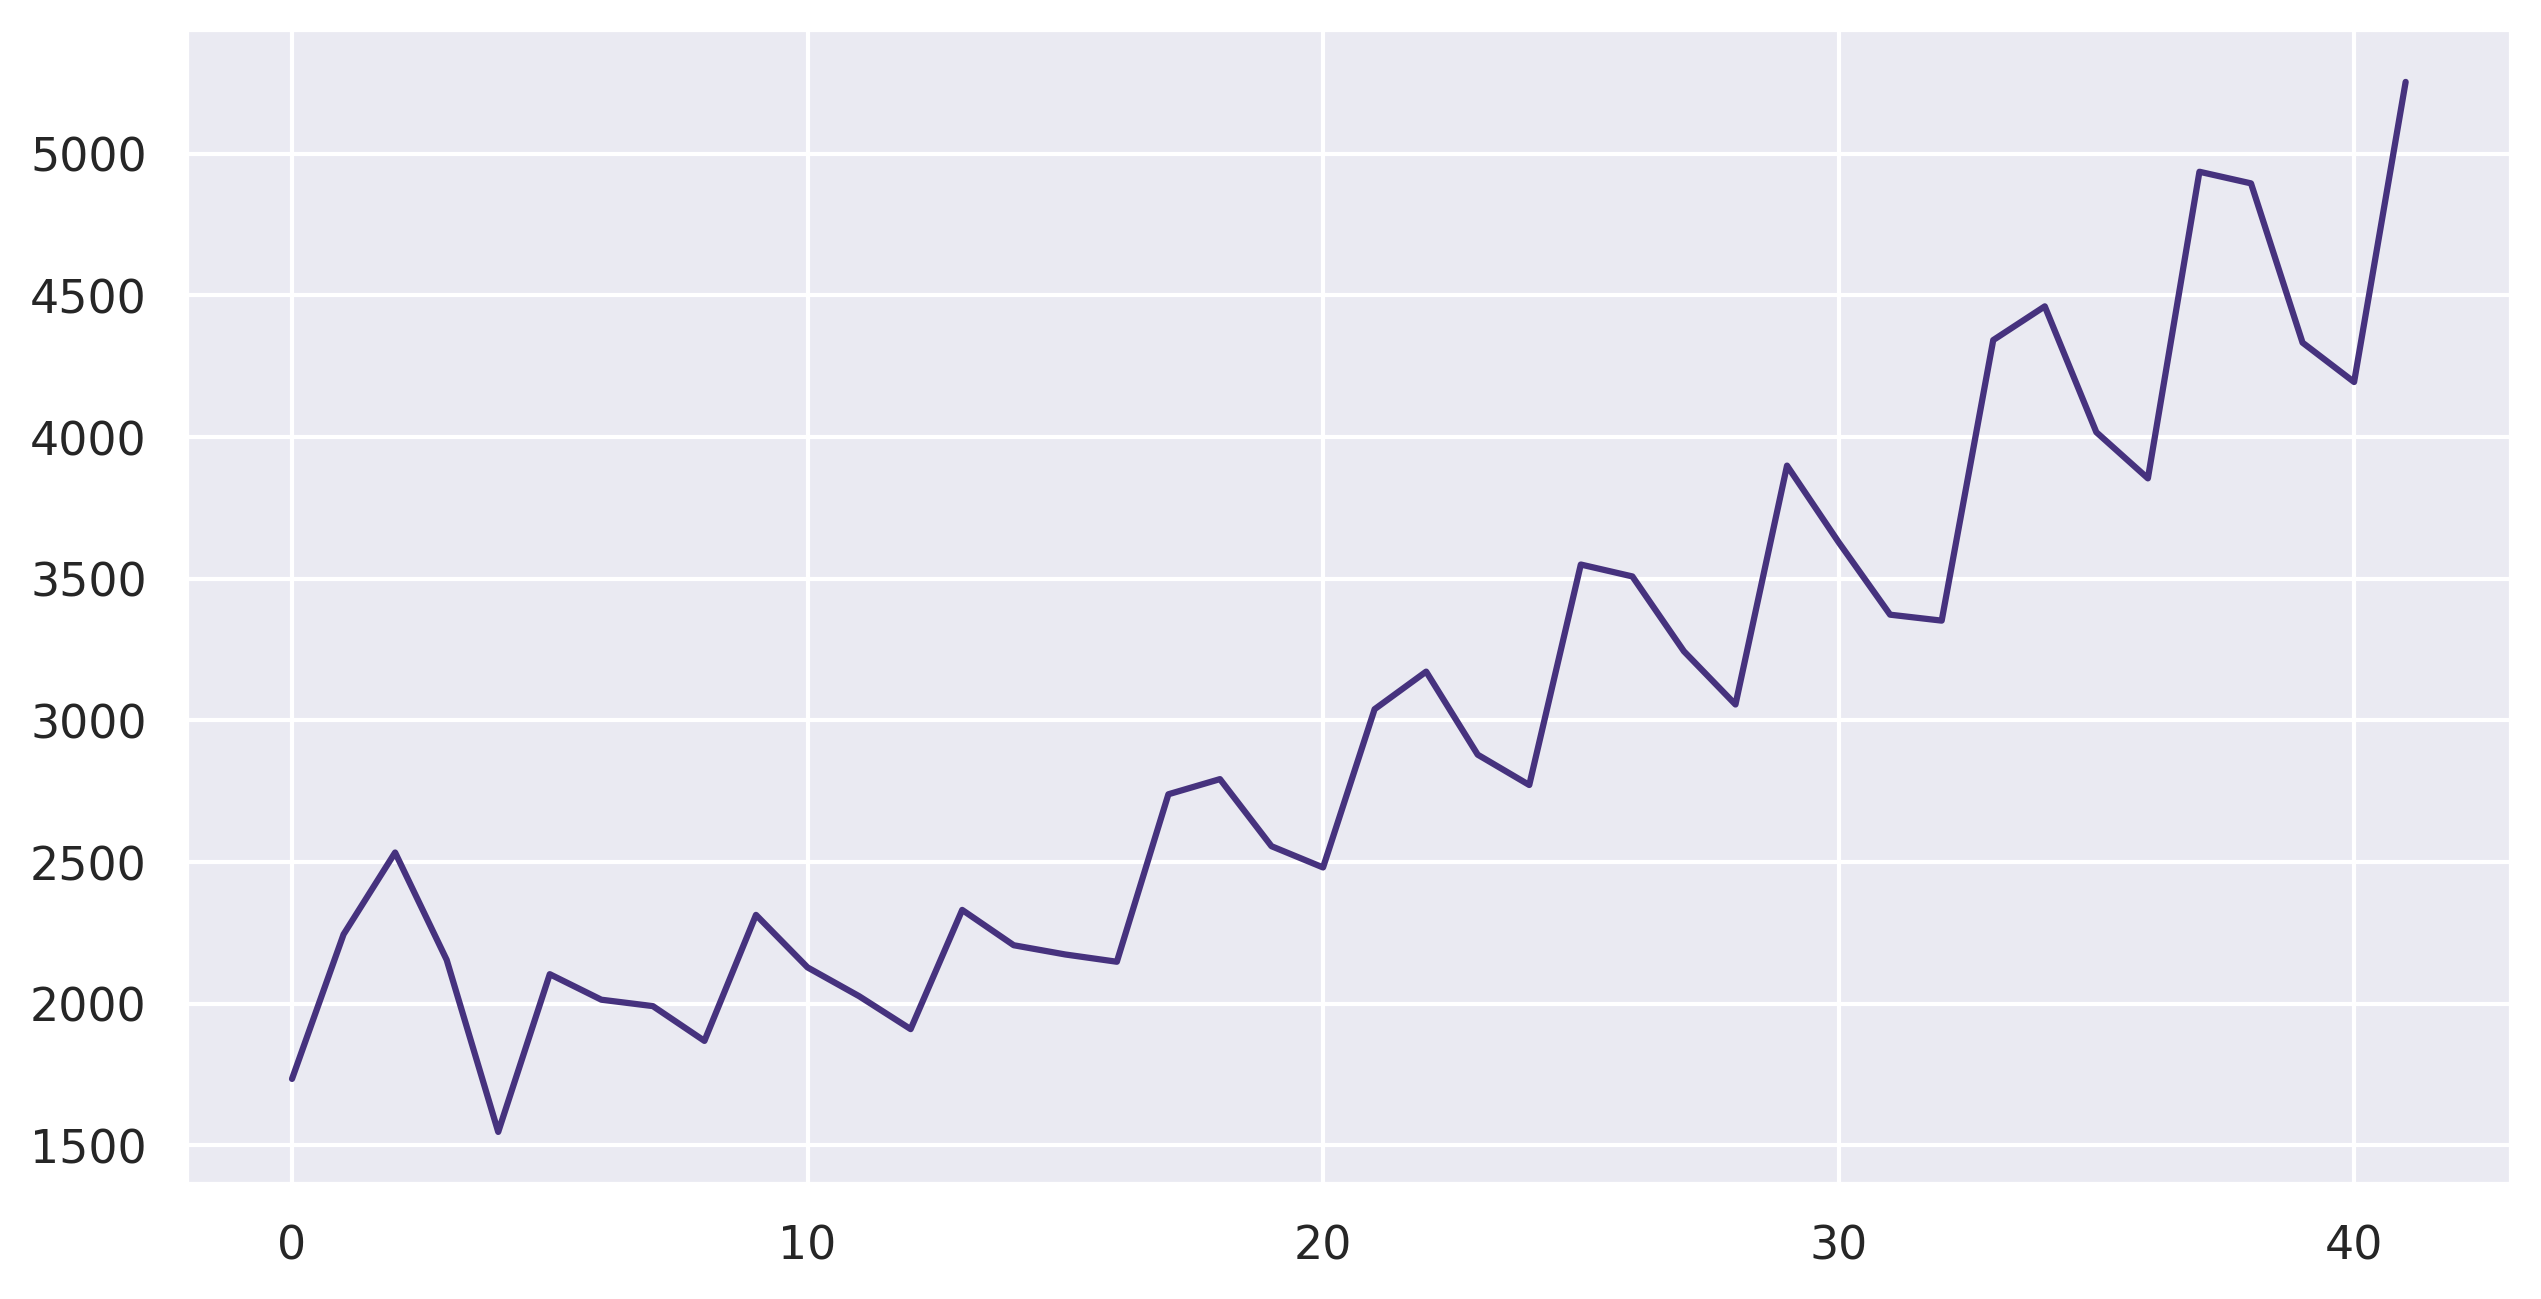

In [392]:
df['Sales'].plot()

In [393]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [394]:
df.shape

(42, 2)

In [395]:
#Splitting Data

In [396]:
Train = df.head(24)
Test = df.tail(12)

In [397]:
Test

,Quarter,Sales
30,Q3_93,3629.0
31,Q4_93,3373.0
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0


In [398]:
#2.ARIMA

<Axes: >

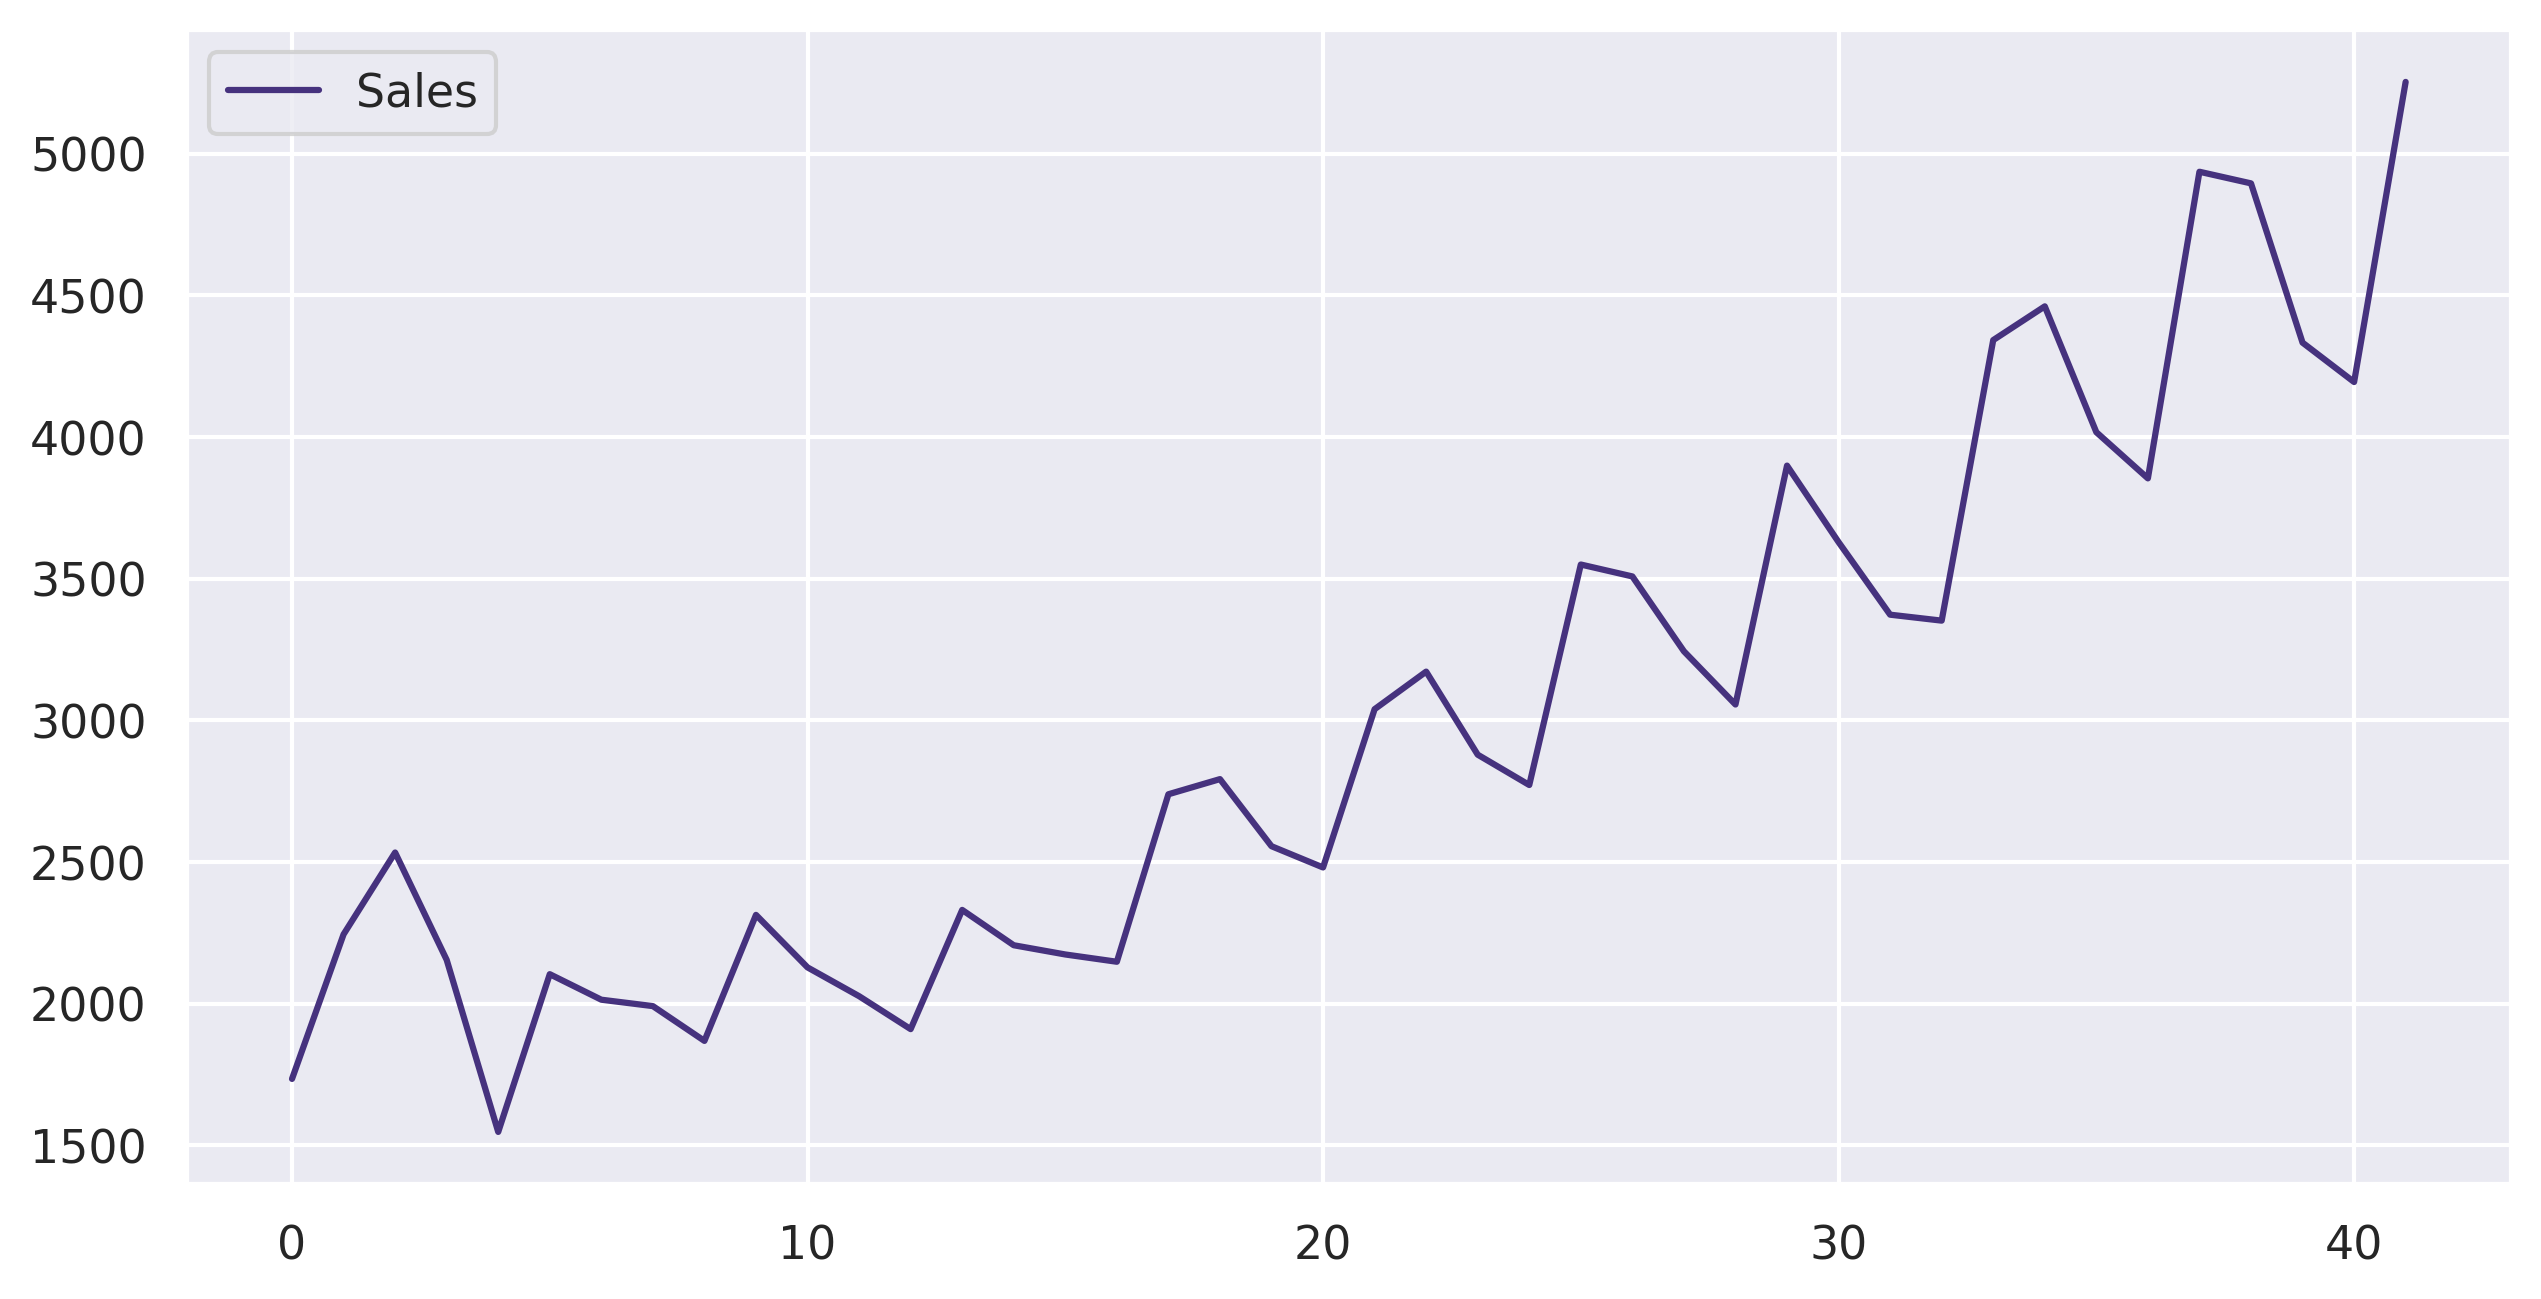

In [399]:
df.plot()

In [400]:
adfuller(df['Sales'])[1]

0.9966611674081021

In [401]:
#Find out Order of ARIMA
order = auto_arima(df['Sales'])
order

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [402]:
df.shape

(42, 2)

In [403]:
#Split the Data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [404]:
train.shape

(12, 2)

In [405]:
test.shape

(30, 2)

In [406]:
#ARIMA Model

In [407]:
model = ARIMA(train['Sales'],order=(1, 0, 5)).fit()

In [408]:
#Evaluating the Model

In [409]:
test

,Quarter,Sales
12,Q1_89,1910.603996
13,Q2_89,2331.164993
14,Q3_89,2206.549995
15,Q4_89,2173.967995
16,Q1_90,2148.278000
17,Q2_90,2739.307999
18,Q3_90,2792.753998
19,Q4_90,2556.009995
20,Q1_91,2480.973999
21,Q2_91,3039.522995


In [410]:
ypred = model.predict(start=11,end=40)
ypred

11    1987.526126
12    1891.282218
13    2013.973958
14    2064.630591
15    2057.170294
16    2039.822451
17    2031.211952
18    2039.738812
19    2031.294778
20    2039.656790
21    2031.376003
22    2039.576354
23    2031.455658
24    2039.497473
25    2031.533773
26    2039.420117
27    2031.610378
28    2039.344256
29    2031.685501
30    2039.269862
31    2031.759173
32    2039.196906
33    2031.831420
34    2039.125361
35    2031.902270
36    2039.055199
37    2031.971751
38    2038.986393
39    2032.039888
40    2038.918918
Name: predicted_mean, dtype: float64

In [411]:
print(np.sqrt(mean_squared_error(test['Sales'],ypred)))

1603.4744617825072


In [412]:
#Airlines

In [413]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Airlines%2BData.csv')
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [414]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [416]:
#Forecasting Methods- Visualization, ARIMA

In [417]:
#1.Visualization

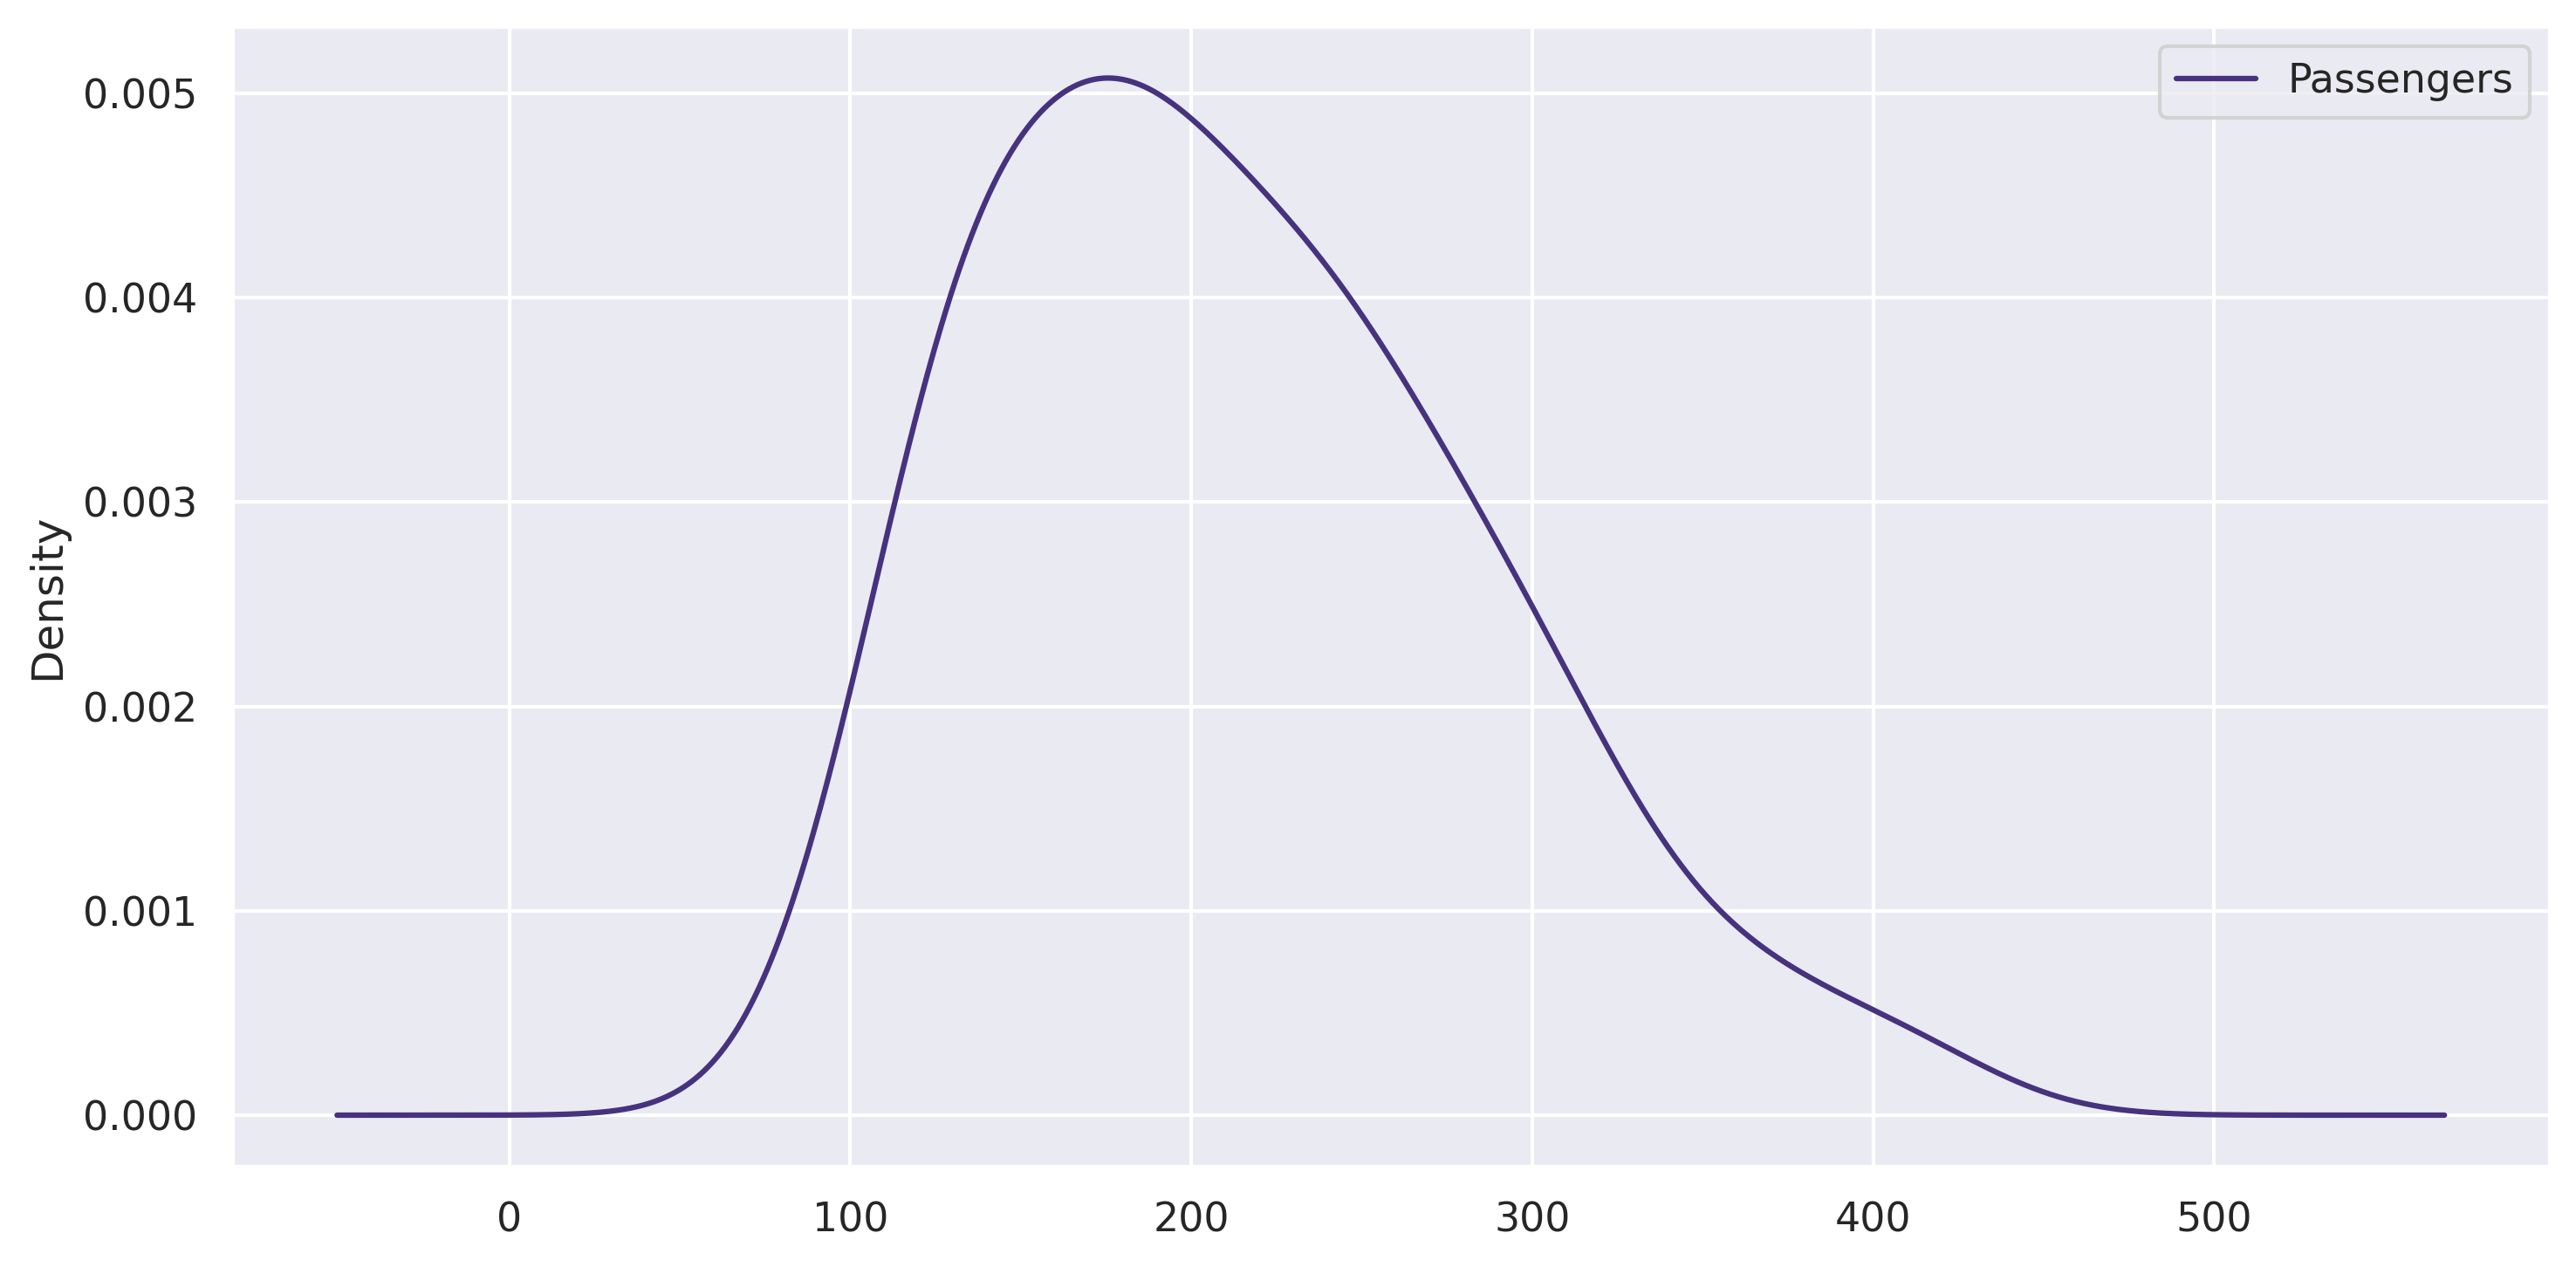

In [418]:
df.plot(kind='kde')
plt.tight_layout()
plt.show()

In [419]:
#Histogram And density Plots
from pandas import read_csv

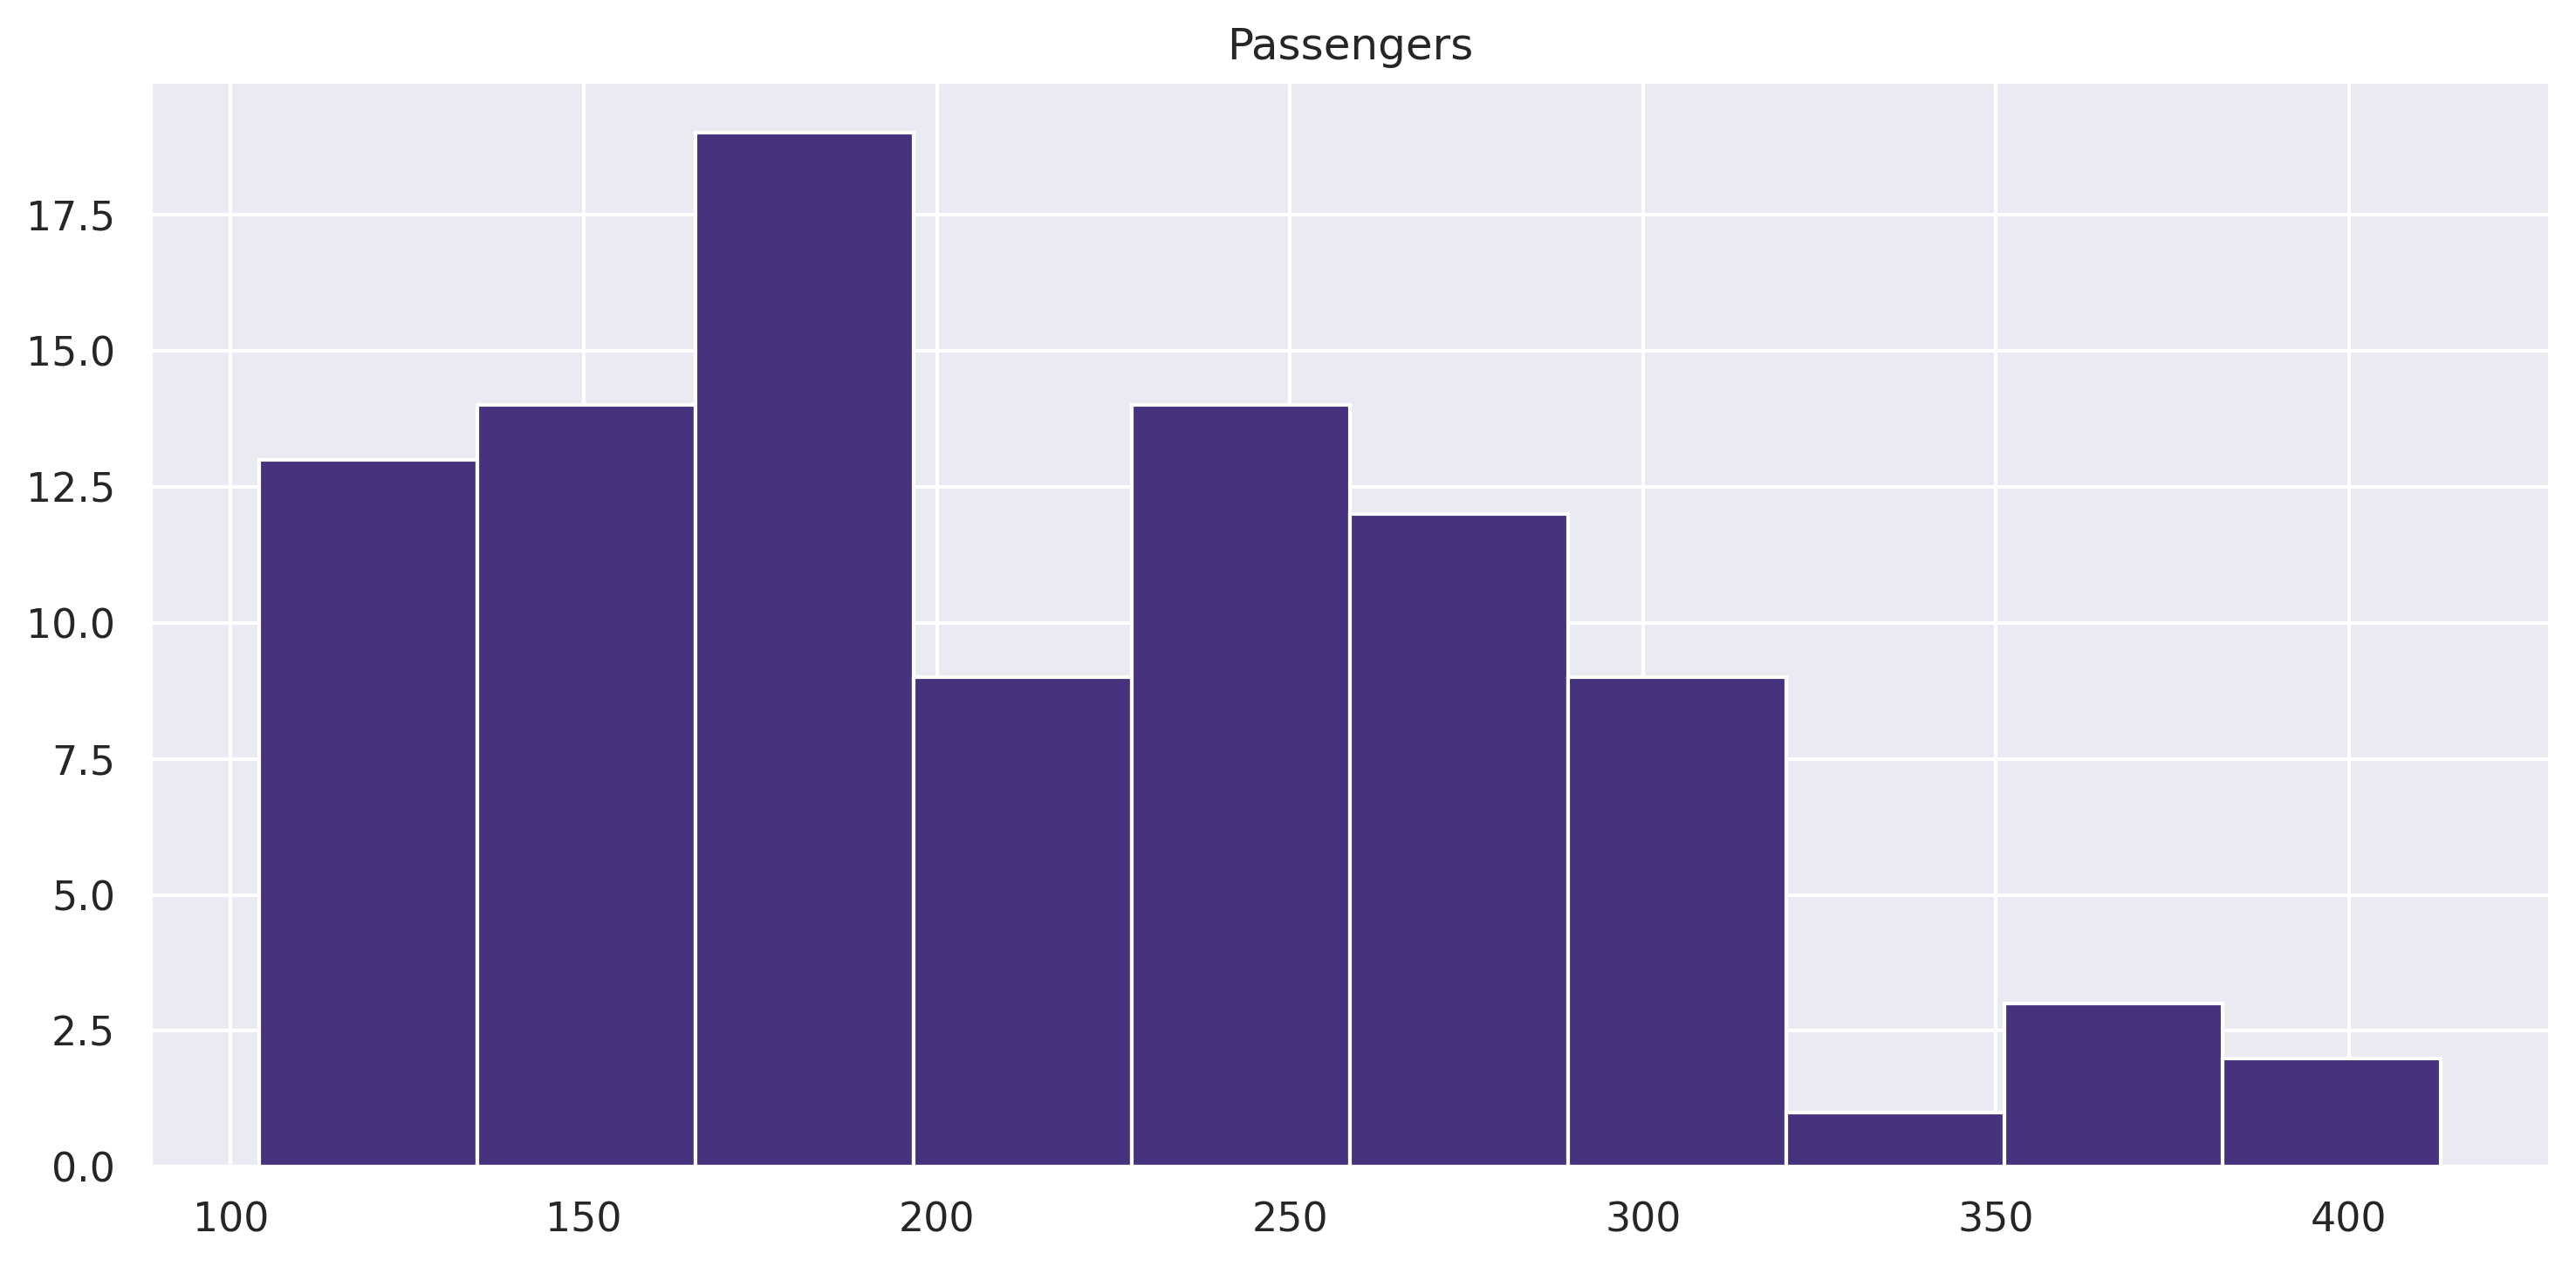

In [420]:
df.hist()
plt.tight_layout()
plt.show()

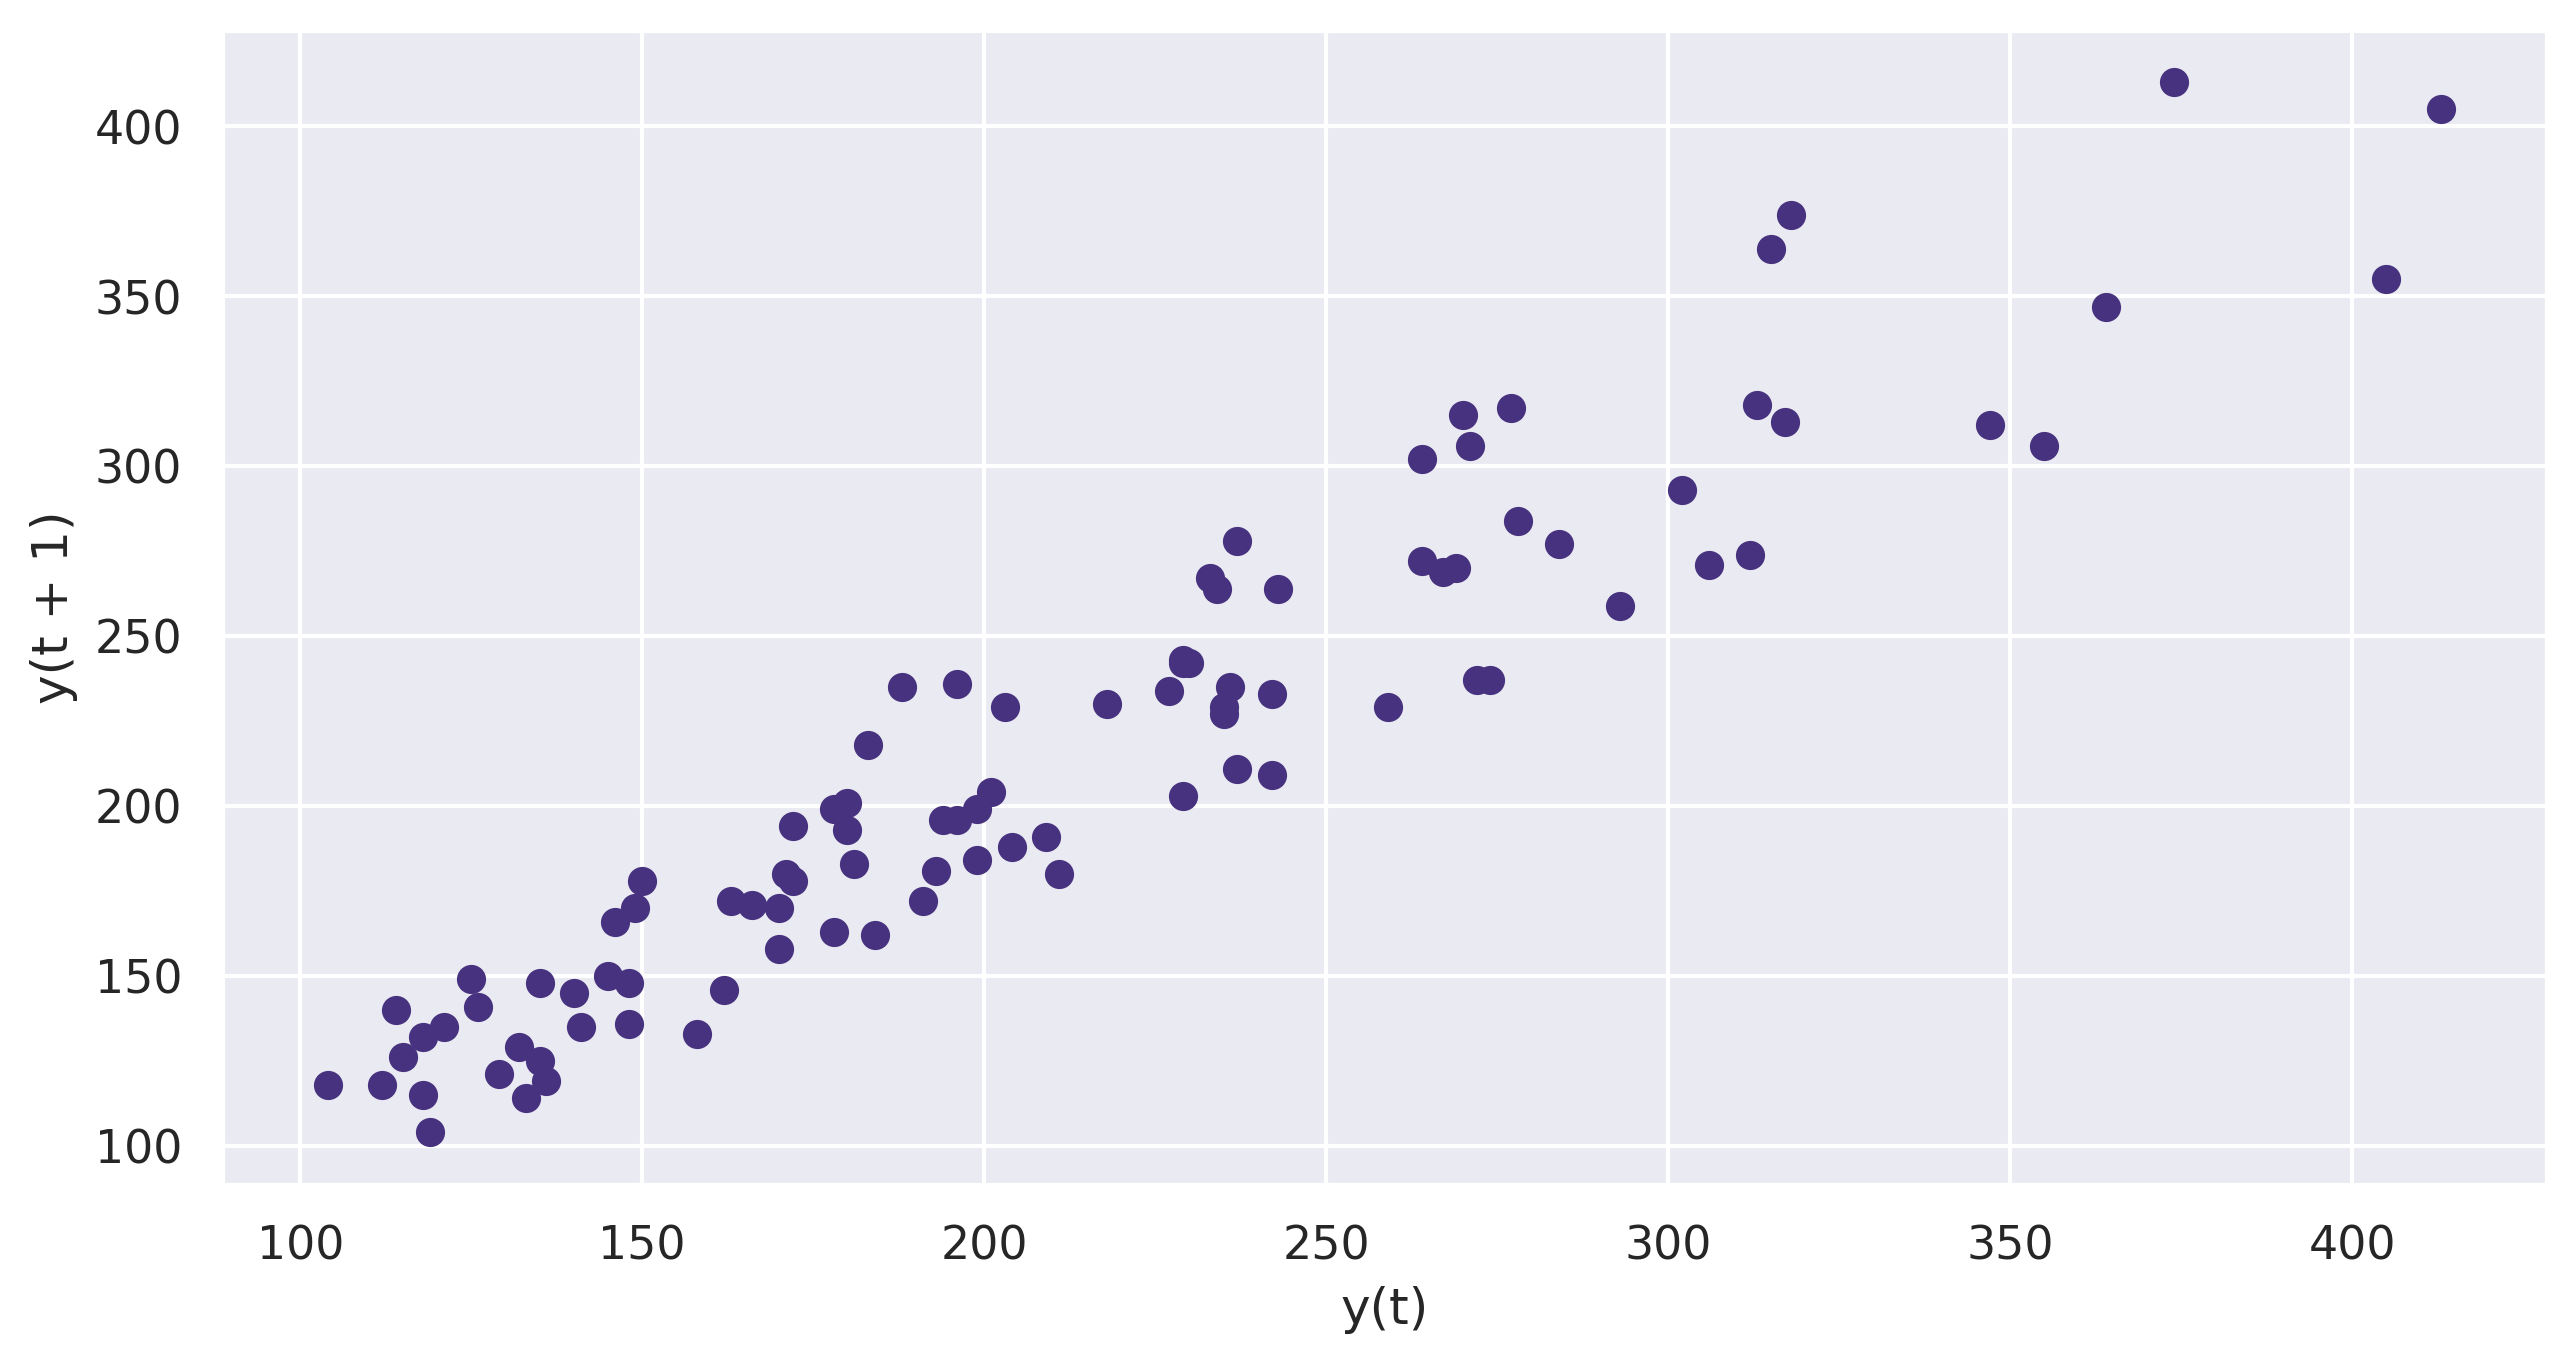

In [421]:
#Lag Plot
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])
plt.show()

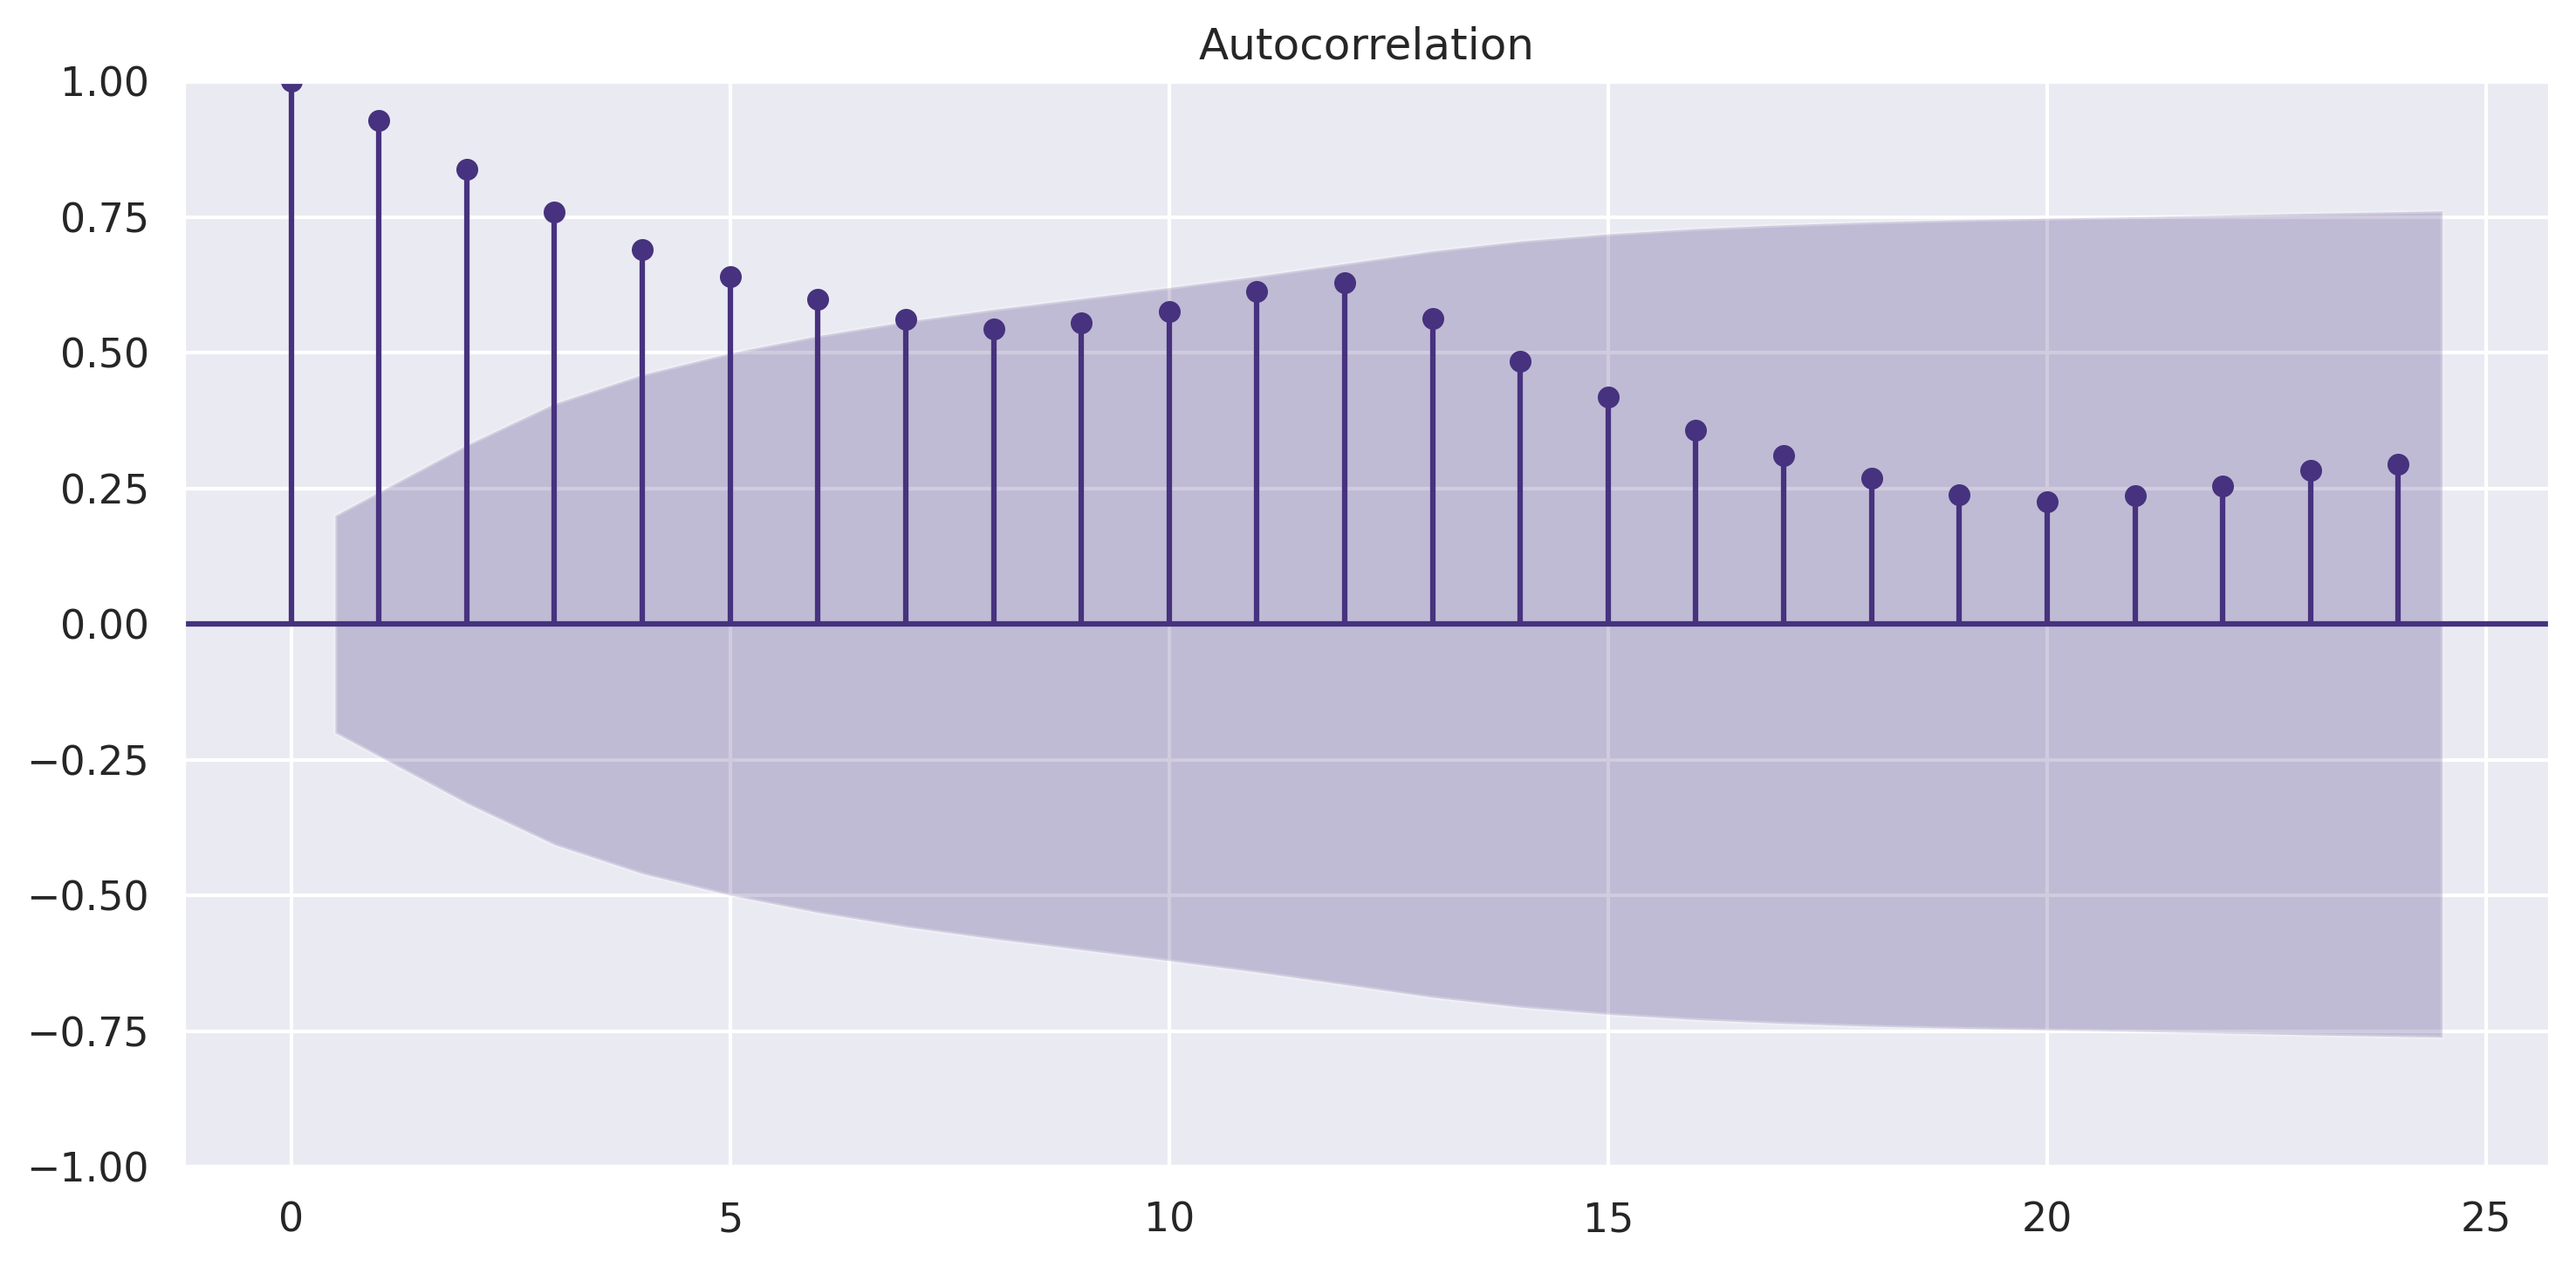

In [422]:
#Create an autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Passengers'],lags=24)
plt.tight_layout()
plt.show()

<Axes: >

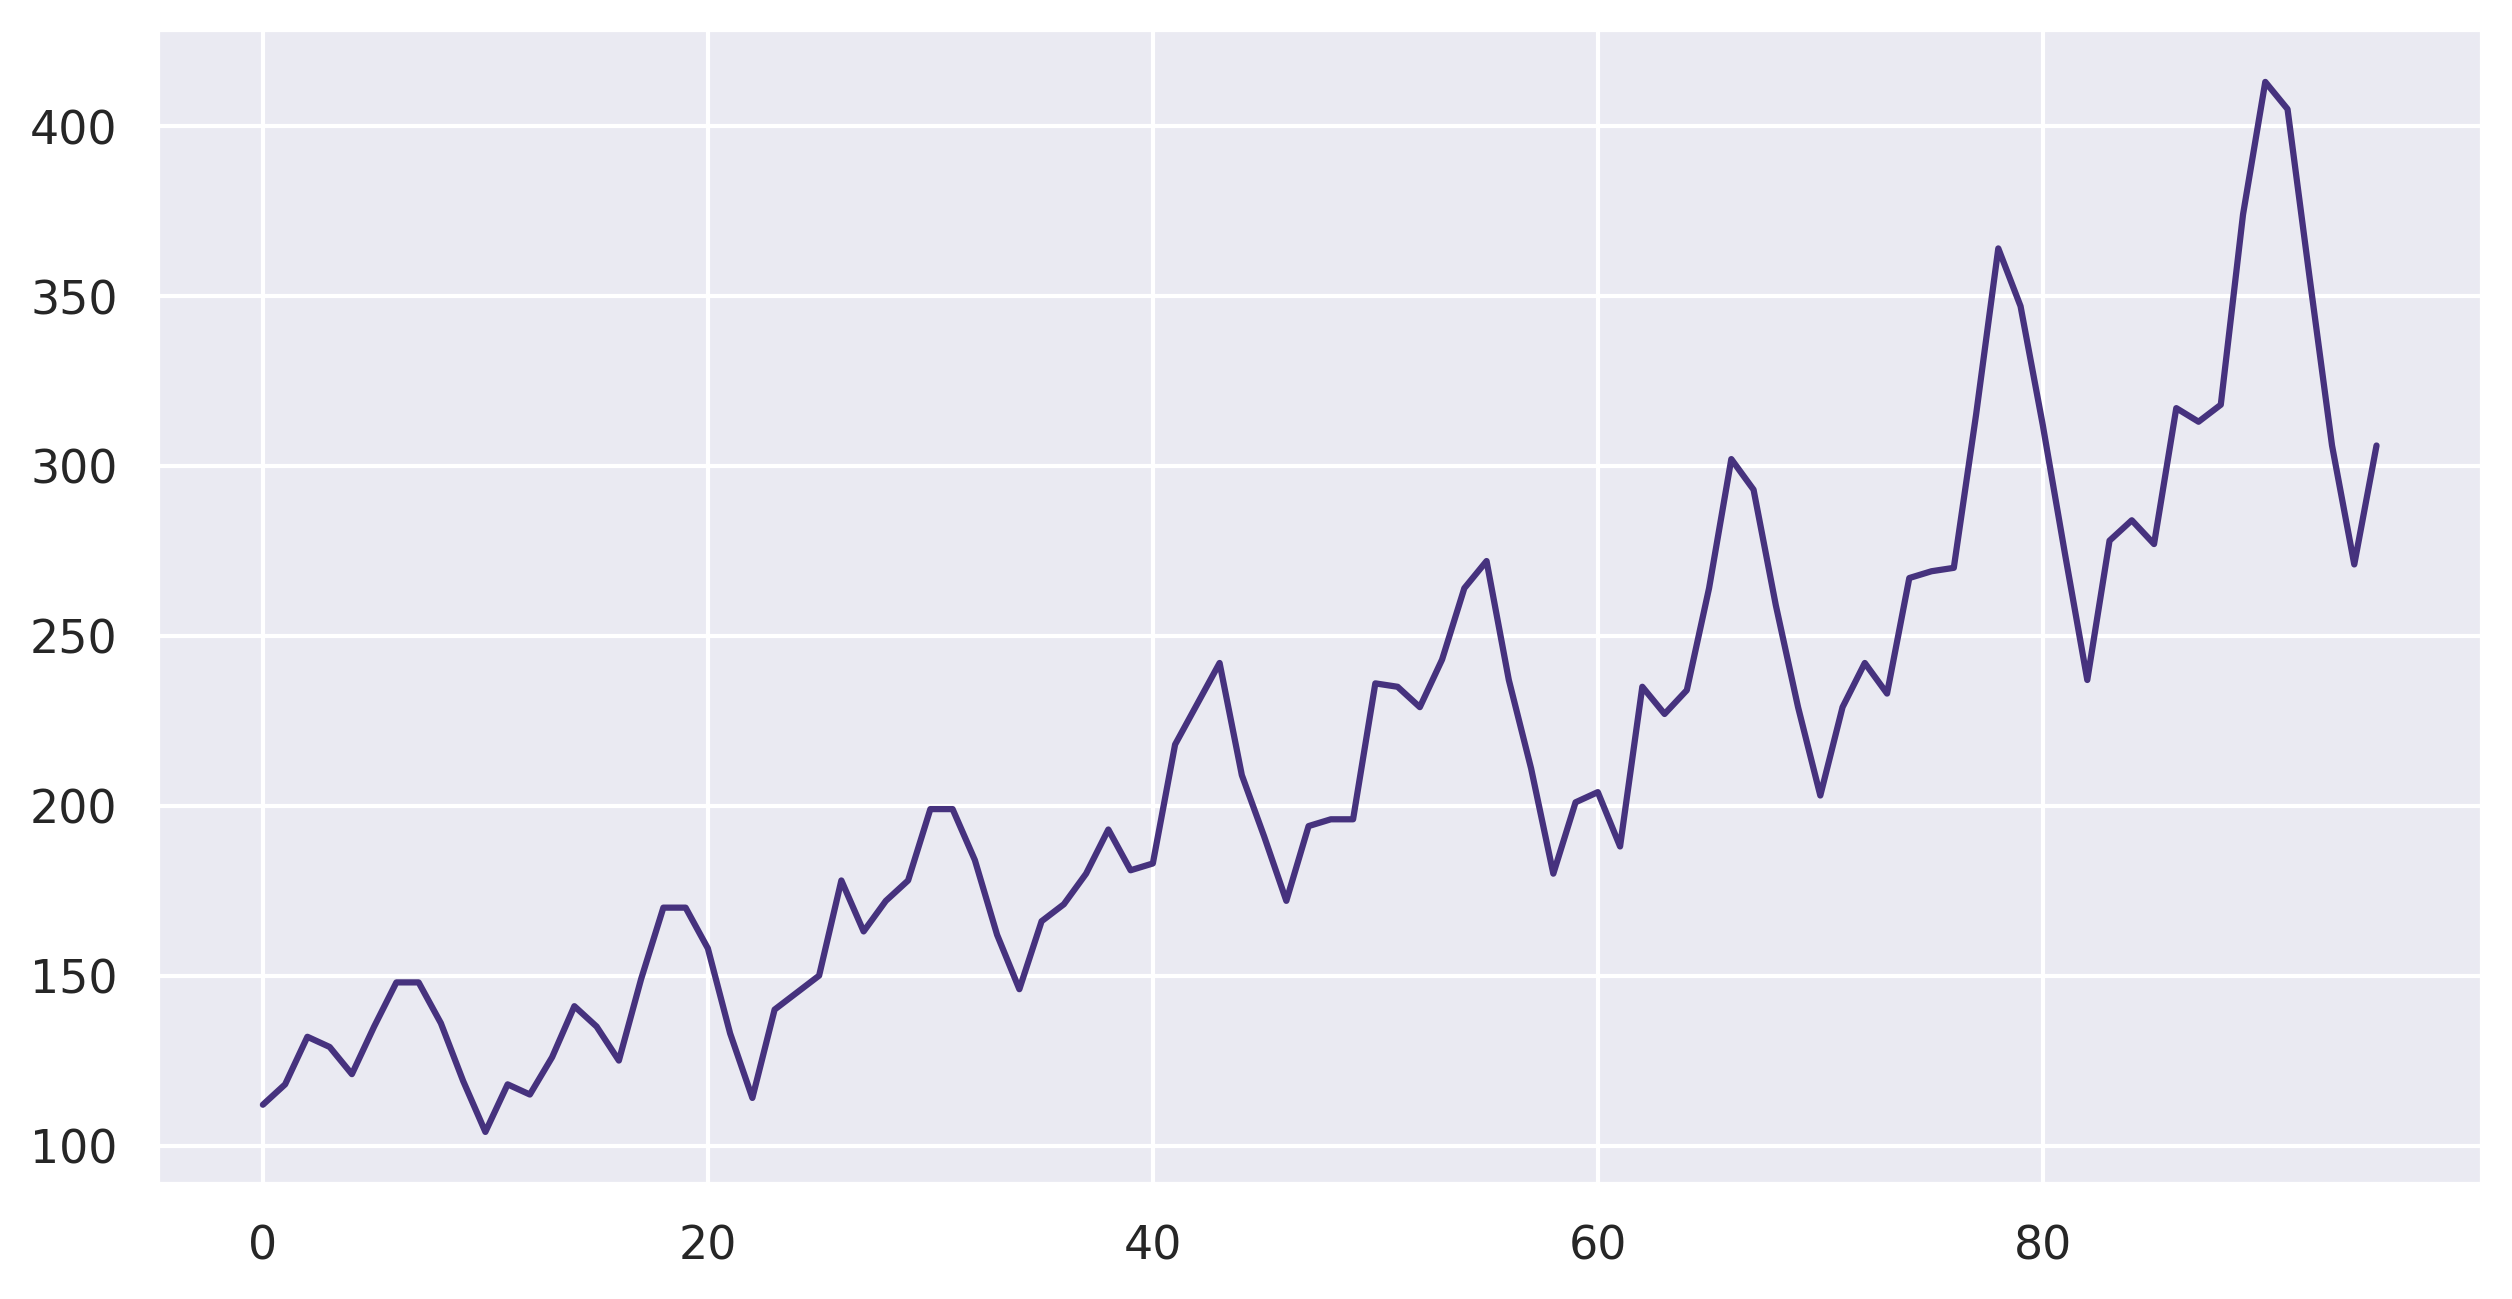

In [423]:
df['Passengers'].plot()

In [424]:
df.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [425]:
df.shape

(96, 2)

In [426]:
#Splitting The Data
Train = df.head(53)
Test = df.tail(24)

In [427]:
Test

,Month,Passengers
72,Jan-01,242
73,Feb-01,233
74,Mar-01,267
75,Apr-01,269
76,May-01,270
77,Jun-01,315
78,Jul-01,364
79,Aug-01,347
80,Sep-01,312
81,Oct-01,274


In [428]:
#2.ARIMA

<Axes: >

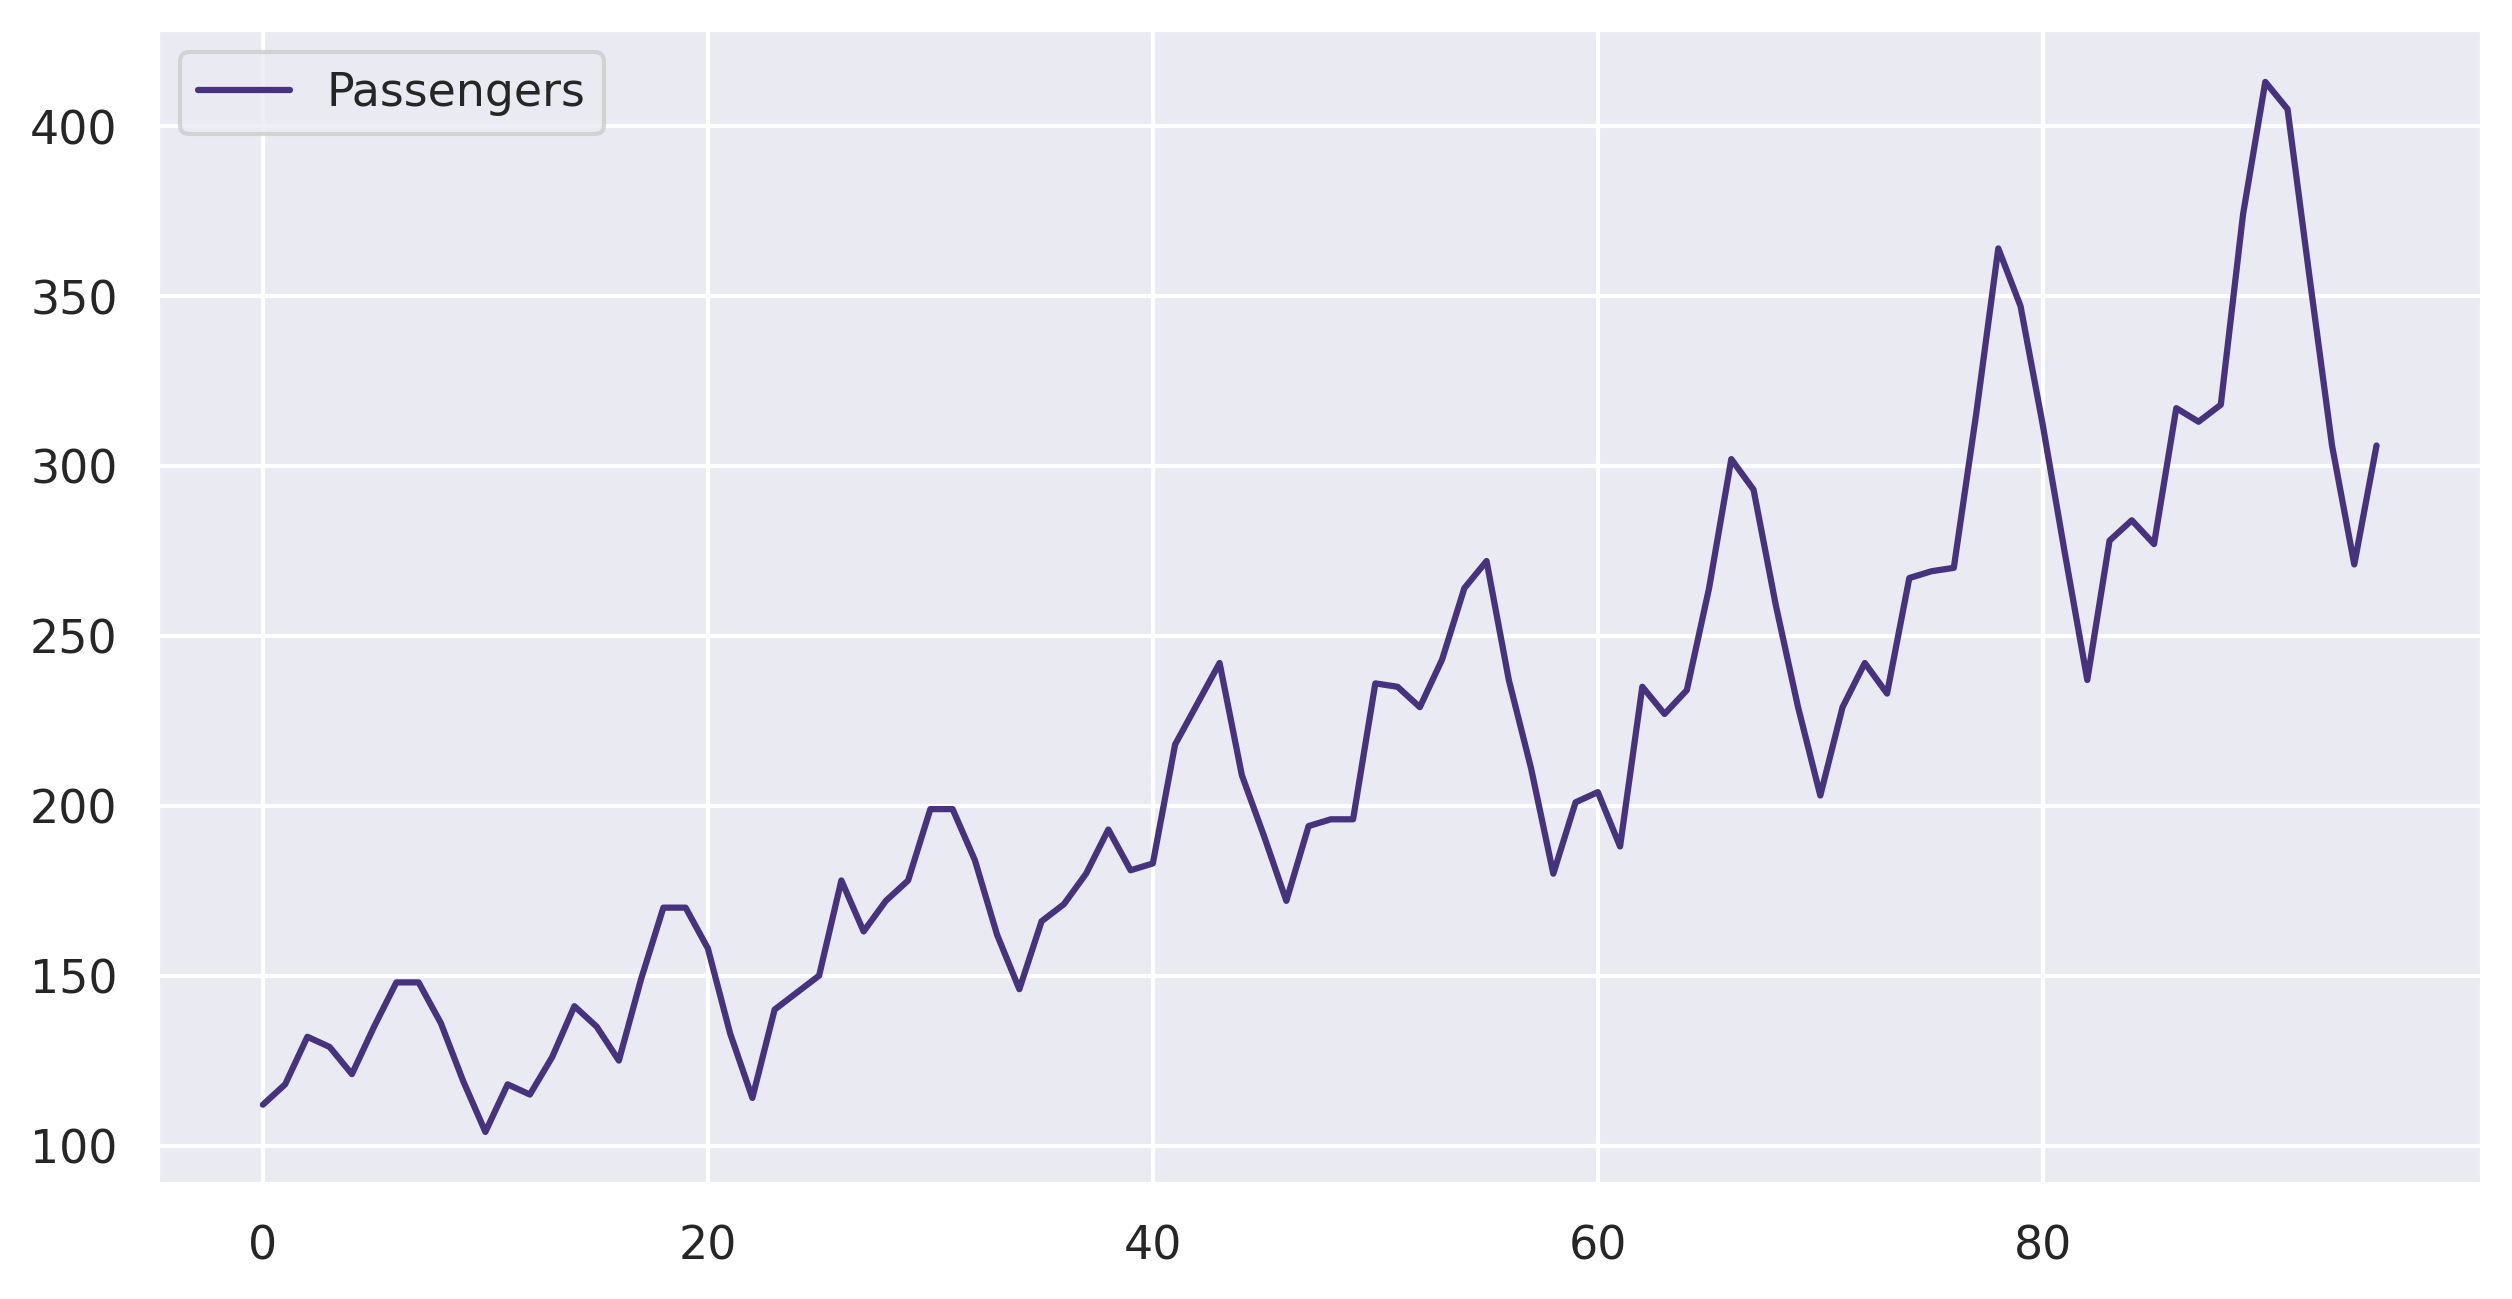

In [429]:
df.plot()

In [430]:
adfuller(df['Passengers'])[1]

0.9968250481137263

In [431]:
#Find Out Order Of ARIMA

In [432]:
order = auto_arima(df['Passengers'])
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [433]:
df.shape

(96, 2)

In [434]:
#Split The Data

In [435]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [436]:
train.shape

(66, 2)

In [437]:
test.shape

(30, 2)

In [438]:
#ARIMA Model

In [439]:
model = ARIMA(train['Passengers'],order=(1,0,5)).fit()

In [440]:
#Evaluating the Model
test

,Month,Passengers
66,Jul-00,302
67,Aug-00,293
68,Sep-00,259
69,Oct-00,229
70,Nov-00,203
71,Dec-00,229
72,Jan-01,242
73,Feb-01,233
74,Mar-01,267
75,Apr-01,269


In [441]:
ypred = model.predict(start=24,end=53)
ypred

24    145.914161
25    148.427416
26    155.152404
27    166.208270
28    165.194931
29    165.572056
30    168.758005
31    205.053485
32    188.015705
33    171.921906
34    152.730471
35    158.743329
36    170.254382
37    175.852323
38    178.710234
39    187.954506
40    179.546236
41    178.145676
42    216.003068
43    232.435741
44    226.079263
45    185.036840
46    194.090731
47    173.951164
48    206.007609
49    191.998443
50    203.340191
51    224.545792
52    240.613395
53    213.148011
Name: predicted_mean, dtype: float64

In [442]:
print(np.sqrt(mean_squared_error(test['Passengers'],ypred)))

121.75249817599324
